In [1]:
# !pip install tensorflow

### Import libraries

In [2]:
# Import librabries
import pandas as pd #interacting with dataframe
import numpy as np #for arrays
import seaborn as sns #For viz
import matplotlib.pyplot as plt  #viz

import yfinance as yf
import plotly.express as px

# from tensorflow.keras.layers import LSTM

In [3]:
# batsl = yf.Ticker("BATS.L")

British American Tobacco data

In [4]:
start = "2004-06-07"
end = "2024-06-07"

def get_stock_data(symbol, start_date, end_date):
 stock_data = yf.download(symbol, start=start_date, end=end_date)
 return stock_data
# Specify stock symbol and date range
stock_symbol = 'BATS.L'
# Fetch historical stock data
batsl = yf.download(stock_symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


Netflix stock data

In [5]:
start = "2004-06-07"
end = "2024-06-07"

def get_stock_data(symbol, start_date, end_date):
 stock_data = yf.download(symbol, start=start_date, end=end_date)
 return stock_data
# Specify stock symbol and date range
stock_symbol = 'NFLX'
# Fetch historical stock data
netflix = yf.download(stock_symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


Tesla stock data

In [6]:
start = "2004-06-07"
end = "2024-06-07"

def get_stock_data(symbol, start_date, end_date):
 stock_data = yf.download(symbol, start=start_date, end=end_date)
 return stock_data
# Specify stock symbol and date range
stock_symbol = 'TSLA'
# Fetch historical stock data
tesla = yf.download(stock_symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
# batsl_data.columns

#### Read data

In [8]:
# # # Read the data
# batsl = pd.read_csv('/content/drive/MyDrive/BATS.L.csv')

# batsl.head()

In [9]:
# batsl.set_index('Date', inplace=True)

In [10]:
batsl.tail()

Open    High     Low   Close    Adj Close   Volume
Date                                                            
2024-05-31  2403.0  2428.0  2374.0  2415.0  2358.371094  7423571
2024-06-03  2439.0  2450.0  2430.0  2435.0  2377.902100  6217147
2024-06-04  2430.0  2432.0  2388.0  2422.0  2365.207031  7667528
2024-06-05  2449.0  2449.0  2423.0  2427.0  2370.089600  4964372
2024-06-06  2417.0  2442.0  2401.0  2434.0  2376.925537  4904974

In [11]:
batsl.shape # Return number of rows and columns

(5064, 6)

In [12]:
batsl.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
batsl.columns # List of columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### Columns
1. Date
2. Open: Open stock price that day
3. High: The highest price that day/daily high price
4. Low: The lowest price that day
5. CLose: The closing price
6. Adj Close: The adjusted stock price after taking dividends, stock splits, and others into consideration
7. The volume of stocks traded that day

In [14]:
batsl.dtypes #Return datatypes of each column

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

All float except Date

In [15]:
batsl.describe() #Statistical summary

Open         High          Low        Close    Adj Close  \
count  5064.00000  5064.000000  5064.000000  5064.000000  5064.000000   
mean   2778.48750  2804.547012  2749.826155  2778.093561  1657.144868   
std    1060.10901  1068.560536  1051.661735  1059.955640   820.807350   
min     787.00000   799.500000   116.500000   793.000000   283.113525   
25%    1902.00000  1923.750000  1882.000000  1899.750000   795.277145   
50%    2788.50000  2820.541992  2762.750000  2793.000000  1828.112305   
75%    3446.00000  3473.000000  3413.125000  3446.625000  2251.858948   
max    5624.00000  5643.600098  5569.000000  5643.000000  3410.239258   

             Volume  
count  5.064000e+03  
mean   4.523278e+06  
std    3.769993e+06  
min    0.000000e+00  
25%    2.548031e+06  
50%    3.550992e+06  
75%    5.309099e+06  
max    9.608739e+07

### Exploratory Data Analysis

1. Univariate analysis
2. Multivariate analysis

In [16]:
# Missing values

print(batsl.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [17]:
batsl.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#### Univariate Analysis

Trends using line charts

1. Closing price trend from 2004-2024

In [18]:
# Line chart using plotly.express
batsl_close = px.line(batsl.reset_index(),
                      x='Date',
                      y='Close',
                      title='British American Tobacco closing prices (2004-2024)',
                      color_discrete_sequence=['blue'], # Color of line
                      width=1000, height=800)

batsl_close.show() #Show plot

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


2. Column "Open"

In [19]:
# Repeat same for open price
batsl_open = px.line(batsl.reset_index(),
                     x='Date',
                     y='Open',
                     title='British American Tobacco Open prices (2004-2024)',
                     color_discrete_sequence=['green'],
                     width=1000, height=800)

batsl_open.show() # Show plot

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [20]:
batsl.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [21]:
# fig = px.line(batsl,
#               x='Date',
#               y='Close',
#               title='British American Tobacco closing prices (2004-2024)',
#               color_discrete_sequence=['blue'],
#               width=1000, height=800)

# fig.add_scatter(x=batsl['Date'], y=batsl['Open'], mode='lines', name='British American Tobacco Open prices (2004-2024)')

# fig.show()

3. Adjusted close

In [22]:
batsl_close = px.line(batsl.reset_index(),
                      x='Date',
                      y='Adj Close',
                      title='British American Tobacco adjusted closing prices (2004-2024)',
                      color_discrete_sequence=['blue'],
                      width=1000, height=800)

batsl_close.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



#### 4. Adjusted close vs close
I did this to show how much the adjusted close price differs from the close price

<Axes: title={'center': 'Close price vs Adjusted close price'}, xlabel='Date'>

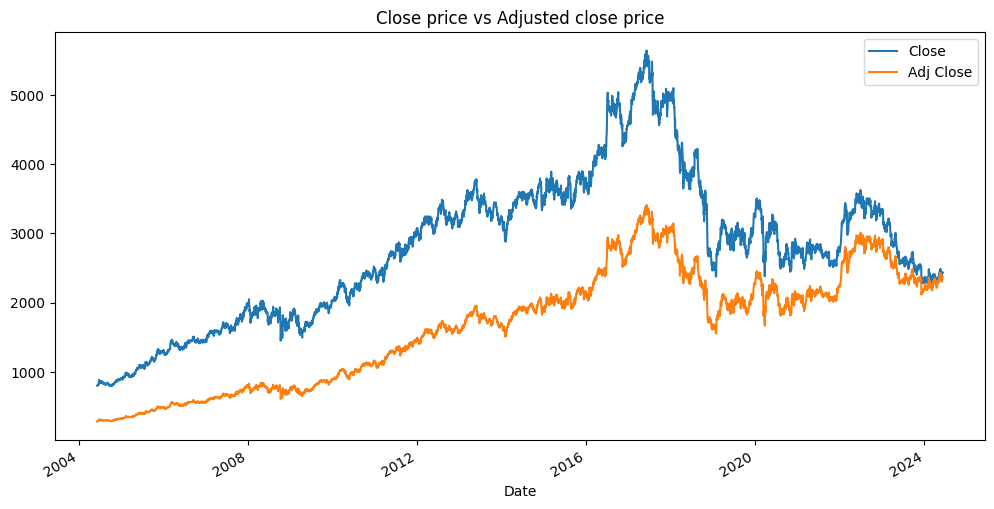

In [ ]:
fig = plt.figure(figsize=(12,6)) # Create figure object
ax = fig.add_subplot(1,1,1)

# Plot close and adjusted close on same plot
batsl.reset_index().plot(x='Date', y=['Close','Adj Close'], ax=ax, title = 'Close price vs Adjusted close price')

5. Do the same for open and close prices

<Axes: title={'center': 'Open price vs Close price'}, xlabel='Date'>

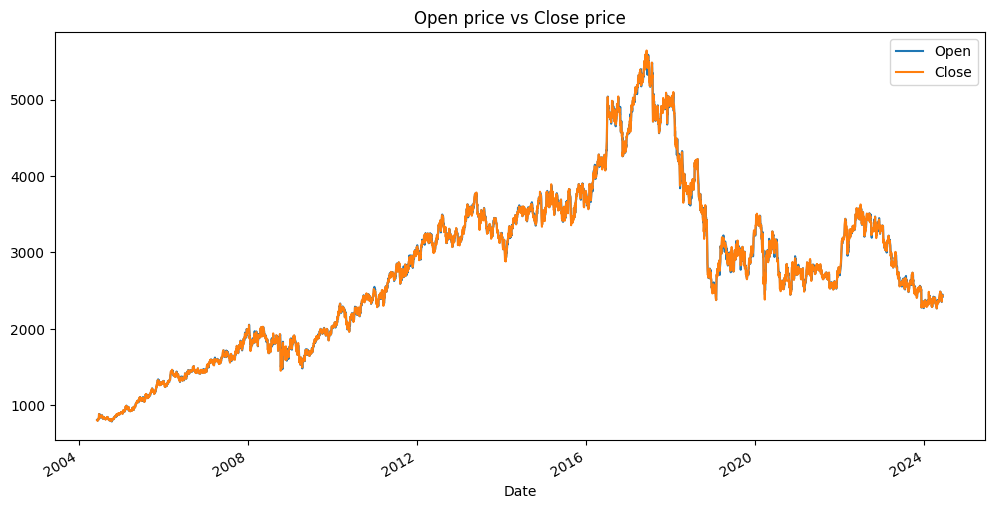

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

batsl.reset_index().plot(x='Date', y=['Open','Close'], ax=ax, title = 'Open price vs Close price')

6. Open price vs High

<Axes: title={'center': 'Open price vs High'}, xlabel='Date'>

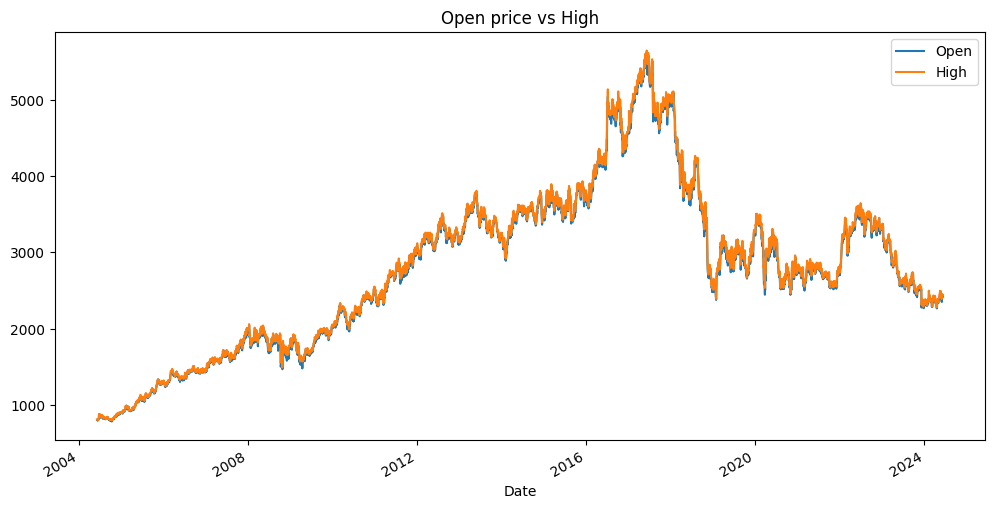

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

batsl.reset_index().plot(x='Date', y=['Open','High'], ax=ax, title = 'Open price vs High')

7. Open price vs Low

<Axes: title={'center': 'Open price vs Low'}, xlabel='Date'>

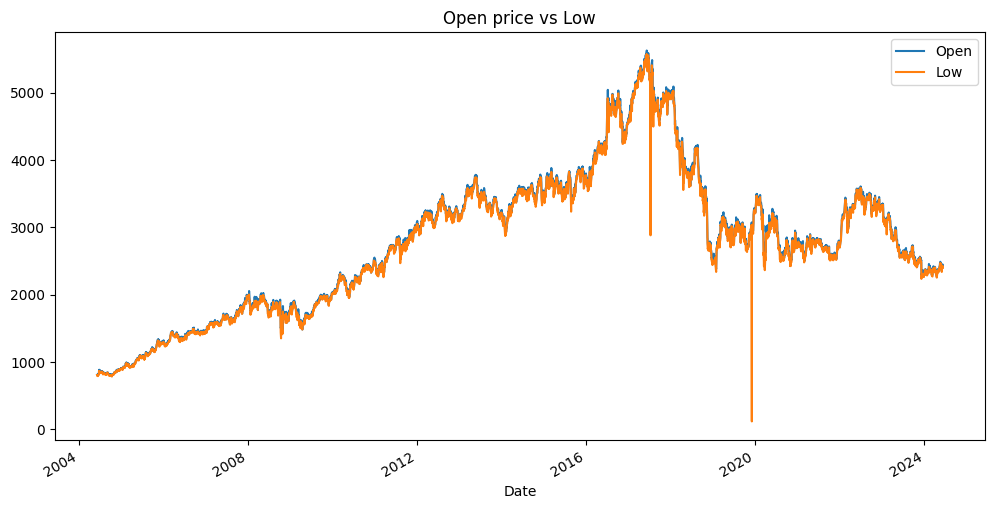

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

batsl.reset_index().plot(x='Date', y=['Open','Low'], ax=ax, title = 'Open price vs Low')

This plot is the same as above, but I used plotly to be able to interact with the plot and see the dates with absymal prices

In [ ]:
fig = px.line(batsl.reset_index(),
              x='Date',
              y='Open',
              title='British American Tobacco Open prices (2004-2024)',
              color_discrete_sequence=['blue'],
              width=1000, height=800)

fig.add_scatter(x=batsl.reset_index()['Date'], y=batsl.reset_index()['Low'], mode='lines')

fig.show()

Looking at the graph above, there are two dates there were irregular low prices, 10/07/2017 and 02/12/2019

In [ ]:
#Irregular low prices dates
low_dates = ['10/07/2017', '02/12/2019']

# Select the rows of those dates
batsl.reset_index()[batsl.reset_index()['Date'].isin(low_dates)]

Date    Open    High     Low   Close   Adj Close   Volume
3724 2019-02-12  2766.5  2778.5  2704.5  2748.0  1797.69873  3760232

In July 2017, BAT acquired Reynolds American Inc, to see if the news surrounding this merger affected the stock price and caused the price drop, we will plot a line chart of stock prices in July, 2017

In [ ]:
# Convert dates to datetime
batsl.reset_index()['Date'] = pd.to_datetime(batsl.reset_index()['Date'], format='%d/%m/%Y')

#Define start and end dates in July 2017
start = '07/01/2017'
end = '07/31/2017'

july_2017 = batsl.reset_index()[(batsl.reset_index()['Date'] >= start) & (batsl.reset_index()['Date'] <= end)]

july_2017.head()

Date    Open    High          Low   Close    Adj Close   Volume
3315 2017-07-03  5214.0  5253.0  5210.000000  5236.0  3164.275879  2503098
3316 2017-07-04  5205.0  5228.0  5177.000000  5177.0  3128.620605  2095120
3317 2017-07-05  5177.0  5262.0  5160.000000  5257.0  3176.966553  3326153
3318 2017-07-06  5246.0  5277.0  5157.669922  5184.0  3132.850586  3188843
3319 2017-07-07  5168.0  5247.0  5160.000000  5219.0  3154.002441  3100051

In [ ]:
fig = px.line(july_2017,
              x='Date',
              y='Low',
              title='British American Tobacco Low prices (2004-2024)',
              color_discrete_sequence=['blue'],
              width=1000, height=800)

fig.show()

The low on the 10th quickly bounced back on the 11th

8. Daily returns

In [ ]:
# Calculate and create a new column on the daily returns which is the percentage in the stock price from one day to the next
batsl['Daily returns'] = batsl['Close'].pct_change()*100

fig = px.line(batsl.reset_index(),
              x='Date',
              y='Daily returns',
              title='British American Tobacco Daily returns (2004-2024)',
              color_discrete_sequence=['green'],
              labels={'Daily Return': 'Daily Return (%)', 'Date': 'Date'},
              hover_data={'Date': True, 'Daily returns': ':.2f'},
              width=1000, height=800)

fig.show() # Show the plot

12.78% in October 2008 was the highest daily return in the 21 year period

In [ ]:
batsl.head() # Display first five rows

Open   High    Low  Close   Adj Close    Volume  Daily returns
Date                                                                       
2004-06-07  808.0  812.0  802.0  803.5  285.422485  36926228            NaN
2004-06-08  804.5  810.5  794.5  806.5  286.488098  10061894       0.373367
2004-06-09  811.0  813.0  805.0  807.0  286.665649   3902359       0.061996
2004-06-10  801.5  806.0  796.0  802.0  284.889618   9393473      -0.619579
2004-06-11  804.0  804.5  795.0  797.0  283.113434   5243904      -0.623441

9. Distribution of Open, High, Low, Close

['High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily returns']


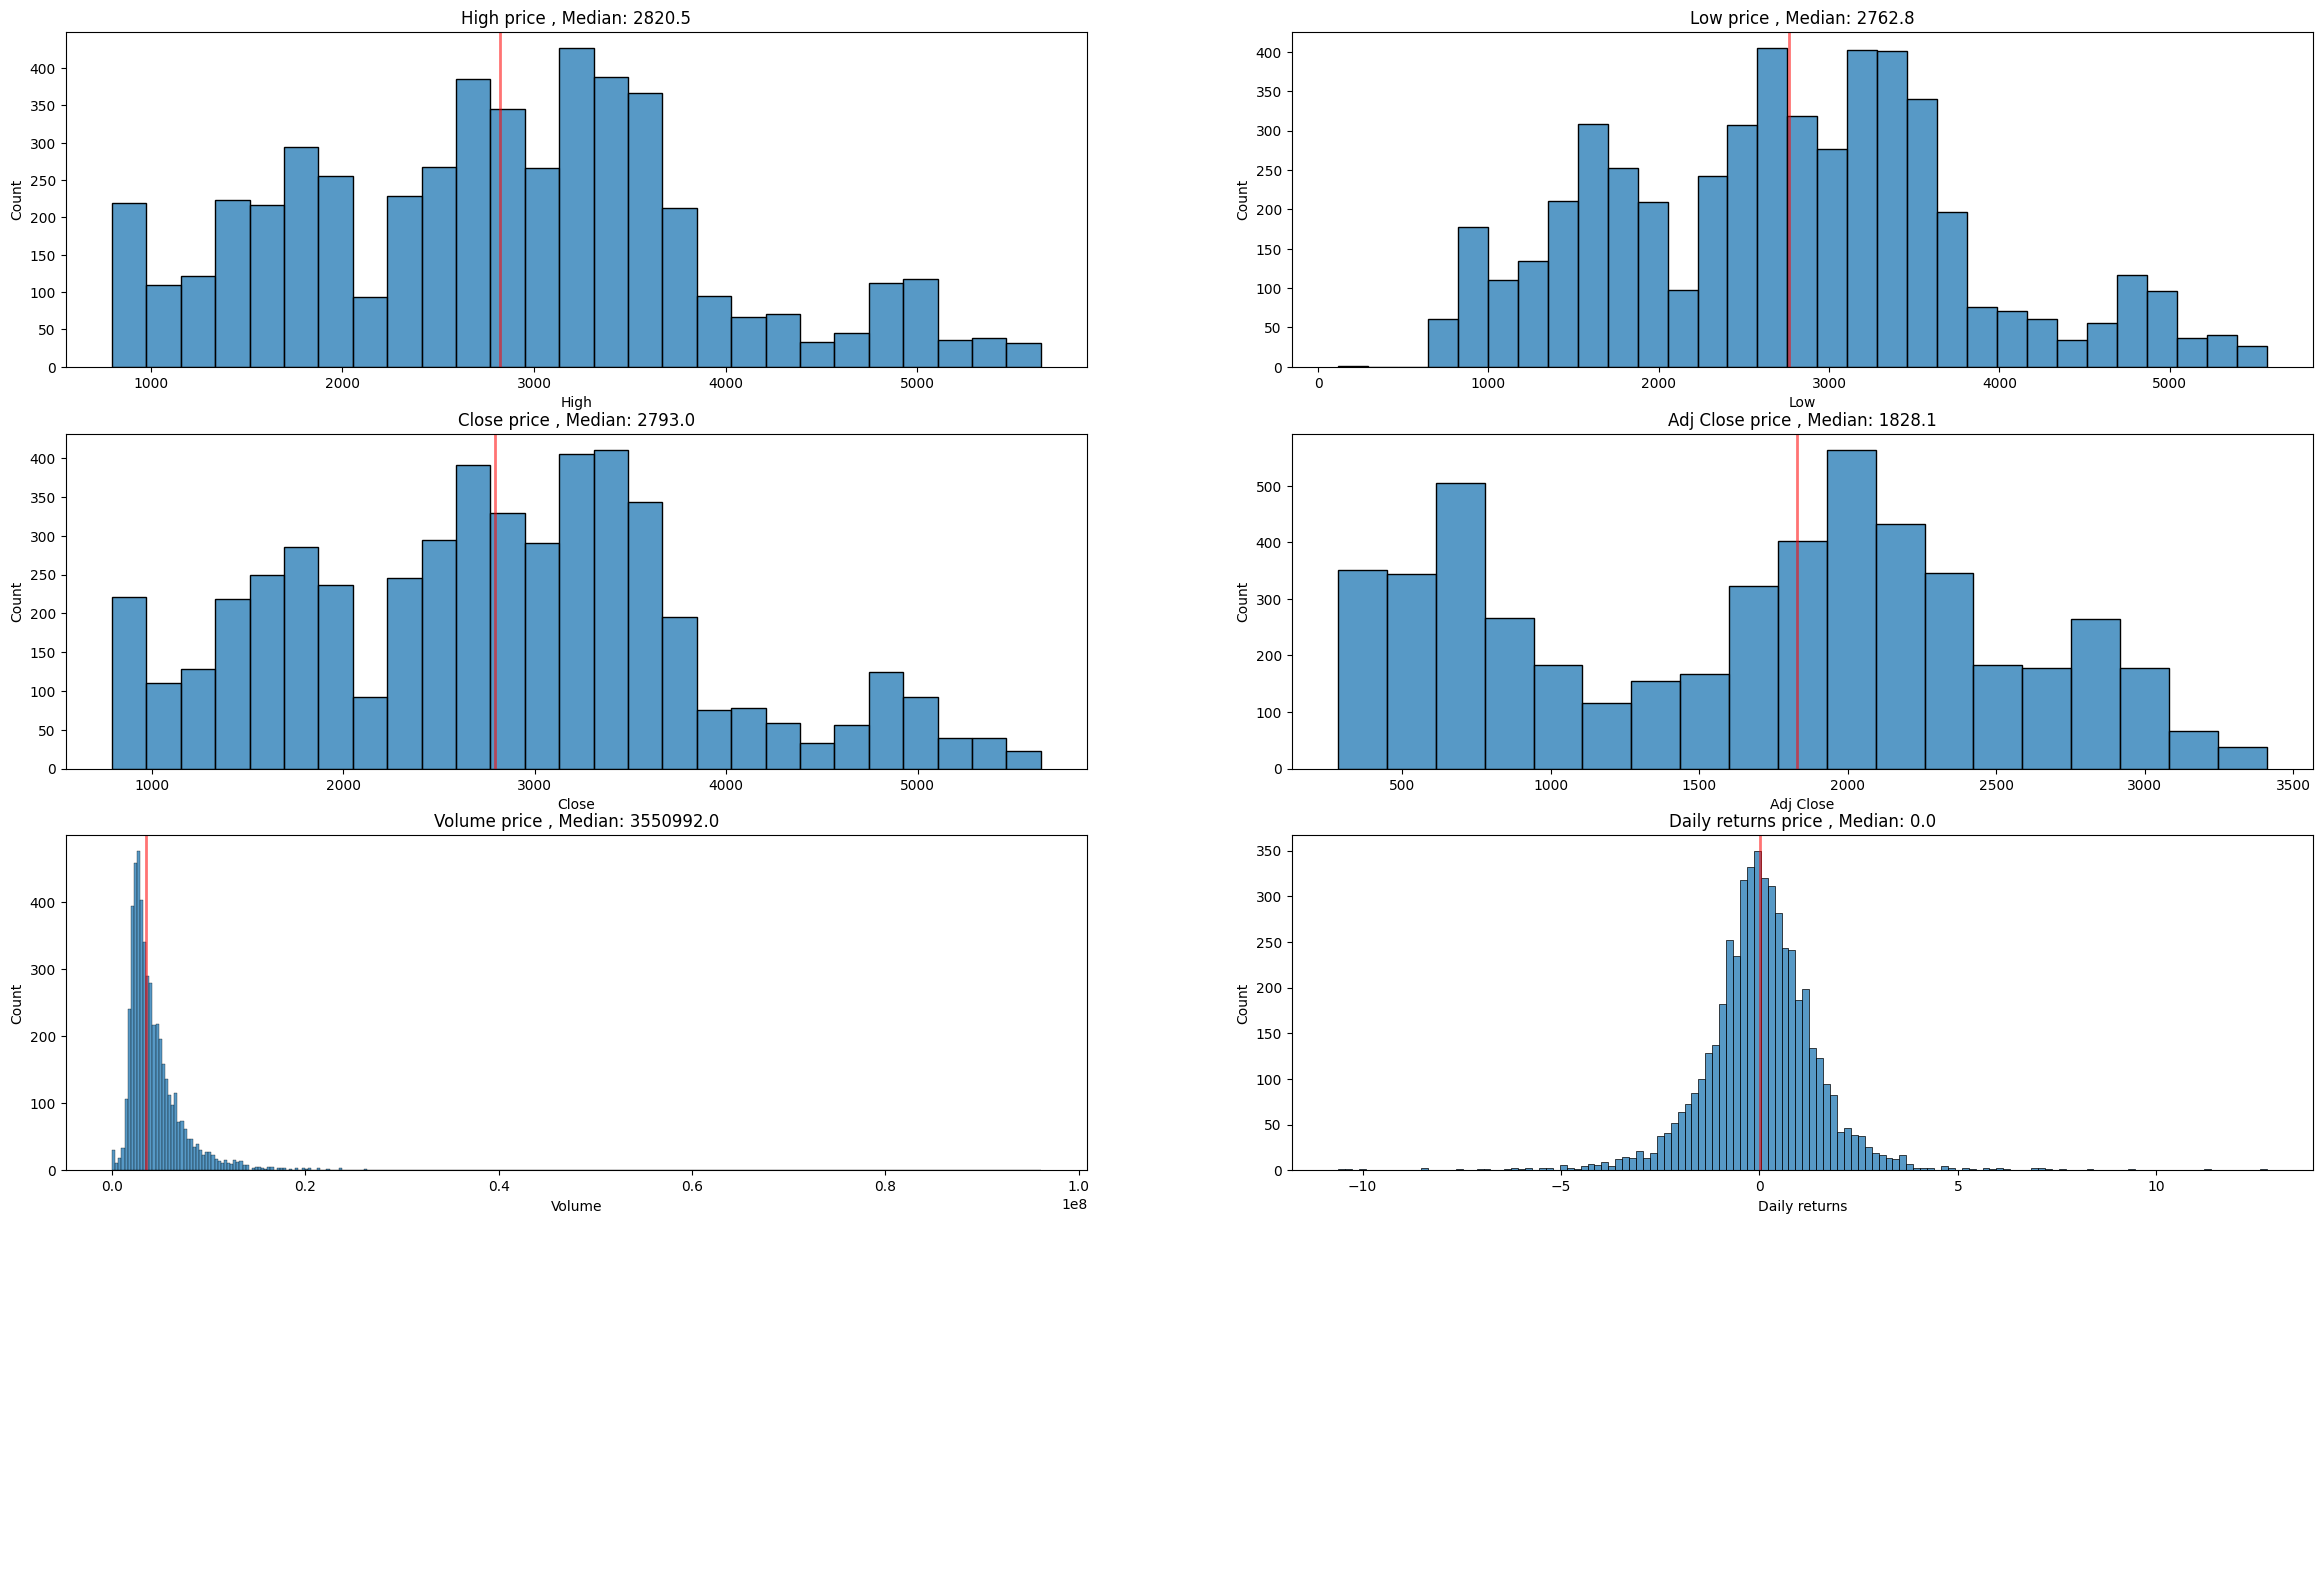

In [ ]:
cols = batsl.columns.tolist()[1:] # all columns except date

fig, axes = plt.subplots(4,2, figsize=(29,20))

for i, ax in enumerate(axes.flatten()):
    if i < len(cols):
        sns.histplot(batsl[cols[i]], ax=ax)
        median = batsl[cols[i]].median()
        ax.set_title(f"{cols[i]} price , Median: {median:0.1f}")
        ax.axvline(median, color ='red', lw=2, alpha = 0.55)
    else:
        # Hide the subplot if there are no more columns to plot
        ax.axis('off')
print(cols)

The plot above shows the distribution of the prices, also showing the median price for the period 2004-2024

## Heatmap / correlation

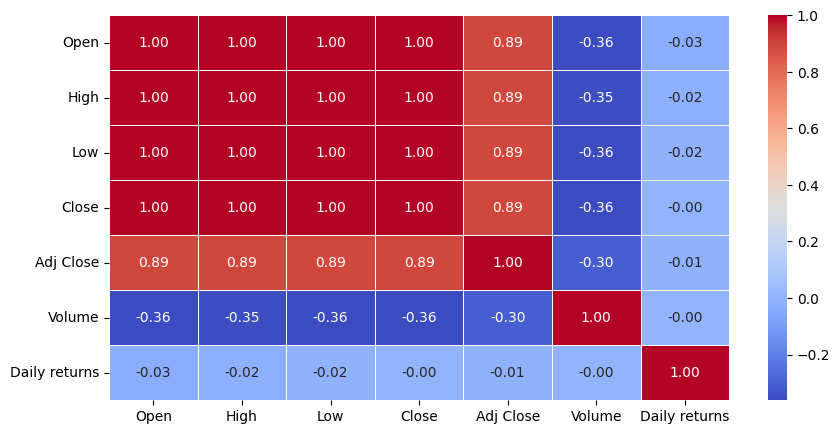

In [ ]:
corr_matrix = batsl[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily returns']].corr()

fig = plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) # Create heatmap

fig.show() # Show plot

### Candlestick chart
Candlestick charts have been adopted most recently in cryptocurrency where increase in price is shown in green, and decrease is shown in red against time. The candlestick chart has an adjustable date axis to show the variation and trend in prices within a specific date

In [ ]:
import plotly.graph_objects as go

# Candlestick chart
figure = go.Figure(data=[go.Candlestick(
    x=batsl.reset_index()['Date'],
    open=batsl['Open'],
    high=batsl['High'],
    low=batsl['Low'],
    close=batsl['Close'],
    increasing_line_color='green',
    decreasing_line_color='red'
)])

# Updating the layout with titles and defining graph size
figure.update_layout(
    title='British American Tobacco Candlestick Chart (2004-2024)', # Graph title
    xaxis_title='Date',
    yaxis_title='Stock Price',
    width=1000,
    height=800
)

# Show the chart

## Outlier detection
Box plots will be used for this

In [ ]:
batsl.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily returns'], dtype='object')

In [ ]:
# Box plot to show outliers / percentile
fig = px.box(
    batsl,
    y=['Open', 'Close', 'High', 'Low', 'Adj Close'], # All columns except volume
    title = 'Outlier detection for British American Tobacco Prices (2004-2024)',
    width=1000,
    height=600
)

fig.show() # Show the plot

In [ ]:
# sns.pairplot(batsl)

### Understanding the trading volume column

To understand and perform exploratory data analysis on the volume column, the following will be done:

1. Descriptive statistics
2. A histogram
3. Boxplot to show outliers

#### Descriptive statistics

In [ ]:
# Get summary statistics of the volume column
summ_vol = batsl['Volume'].describe()

print(summ_vol) # Print result

count    5.064000e+03
mean     4.523278e+06
std      3.769993e+06
min      0.000000e+00
25%      2.548031e+06
50%      3.550992e+06
75%      5.309099e+06
max      9.608739e+07
Name: Volume, dtype: float64


#### Distribution - Histogram

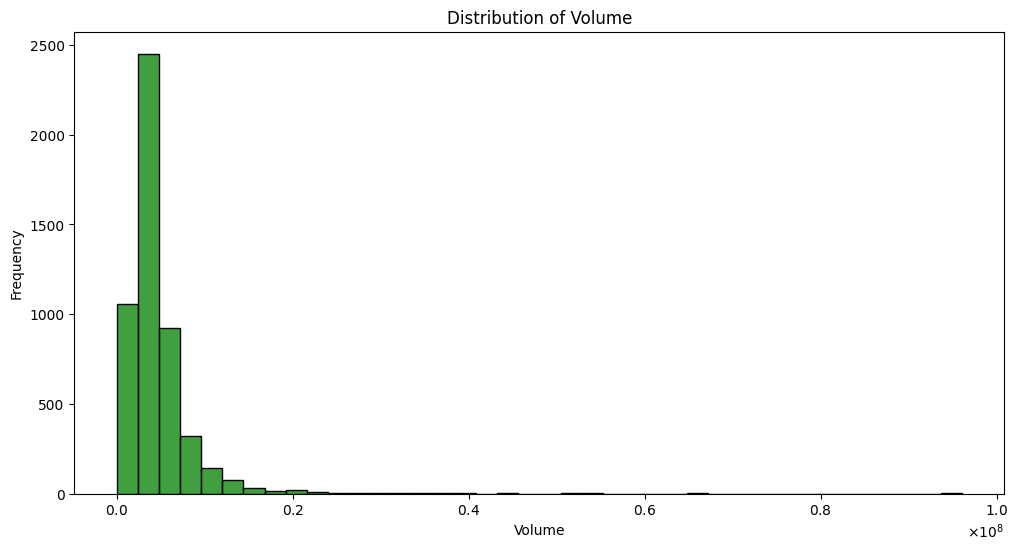

In [ ]:
import matplotlib.ticker as ticker #To specify tick format

plt.figure(figsize=(12, 6)) # Create figure object with specific size

sns.histplot(batsl['Volume'], color='green', bins=40) # Plot histogram to show distribution
plt.title('Distribution of Volume') # Set chart tile
plt.xlabel('Volume') # Set x axis title
plt.ylabel('Frequency') # Set y axis title

plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True)) # To turn the x axis to normal figure format

plt.show() # Show plot

#### Box plot

In [ ]:
fig = px.box(
    batsl,
    y=['Volume'], # Volume column
    title = 'Volume - British American Tobacco Prices (2004-2024)',
    width=1000,
    height=600)

fig.show() # Show the plot

The end!

## Data preprocessing

### Missing values

In [ ]:
print(batsl.isnull().sum()) #Print the number of missing values in each column

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Daily returns    1
dtype: int64


In [ ]:
batsl[batsl['Daily returns'].isnull()] # Return the row with the 'Open' missing value

Open   High    Low  Close   Adj Close    Volume  Daily returns
Date                                                                       
2004-06-07  808.0  812.0  802.0  803.5  285.422394  36926228            NaN

Turns out the missing value is the first row in the daily returns column, since the returns started from the second day the data started

May 2021

In [ ]:
# batsl.drop("Volume", axis=1, inplace=True)

In [ ]:
# # Define start and end dates
# start = '05/01/2021'
# end = '05/31/2021'

# May_2021 = batsl[(batsl['Date'] >= start) & (batsl['Date'] <= end)] # Assign May dataframe

# May_2021.head()
# # May_2021.tail()

In [ ]:
# # Replace missing values with average of each column in the month of May 2021
# batsl['Open'].replace(np.nan, May_2021['Open'].mean(), inplace=True)
# batsl['High'].replace(np.nan, May_2021['High'].mean(), inplace=True)
# batsl['Low'].replace(np.nan, May_2021['Low'].mean(), inplace=True)
# batsl['Close'].replace(np.nan, May_2021['Close'].mean(), inplace=True)
# batsl['Adj Close'].replace(np.nan, May_2021['Adj Close'].mean(), inplace=True)
# batsl['Volume'].replace(np.nan, May_2021['Volume'].mean(), inplace=True)
# batsl['Daily returns'].replace(np.nan, May_2021['Daily returns'].mean(), inplace=True)

In [ ]:
batsl.dropna(inplace=True)

In [ ]:
batsl.isnull().sum() # Return number of missing values in each column

Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
Daily returns    0
dtype: int64

All missing values have been taken care of

#### Duplicates

In [ ]:
duplicates = batsl.duplicated(subset=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily returns']) # Duplicate rows

print(batsl[duplicates]) # Print duplicate rows

              Open    High     Low   Close   Adj Close  Volume  Daily returns
Date                                                                         
2004-12-28   898.0   898.0   898.0   898.0  323.864471       0            0.0
2005-03-28   934.5   934.5   934.5   934.5  347.510864       0            0.0
2005-12-27  1279.0  1279.0  1279.0  1279.0  481.527771       0            0.0


No duplicates

### Feature engineering
Adding some calculated new features to improve the performance of the predictive model

In [ ]:
# Calculating the daily range, high minus low
batsl['Daily range'] = batsl['High'] - batsl['Low']

In [ ]:
batsl.head() # Displayy first five rows

Open   High    Low  Close   Adj Close    Volume  Daily returns  \
Date                                                                          
2004-06-08  804.5  810.5  794.5  806.5  286.488098  10061894       0.373367   
2004-06-09  811.0  813.0  805.0  807.0  286.665649   3902359       0.061996   
2004-06-10  801.5  806.0  796.0  802.0  284.889618   9393473      -0.619579   
2004-06-11  804.0  804.5  795.0  797.0  283.113434   5243904      -0.623441   
2004-06-14  799.0  814.0  789.0  807.0  286.665649  13340515       1.254705   

            Daily range  
Date                     
2004-06-08         16.0  
2004-06-09          8.0  
2004-06-10         10.0  
2004-06-11          9.5  
2004-06-14         25.0

In [ ]:
inputs = (batsl['Close']).to_numpy()
outputs = (batsl['Close']).to_numpy()


batsl.tail(5)
days = []
count = 0
for elements in inputs:
  count += 1
  days.append(count)
batsl['Days'] = days
batsl.head(10)

Open   High         Low  Close   Adj Close    Volume  \
Date                                                                
2004-06-08  804.5  810.5  794.500000  806.5  286.488098  10061894   
2004-06-09  811.0  813.0  805.000000  807.0  286.665649   3902359   
2004-06-10  801.5  806.0  796.000000  802.0  284.889618   9393473   
2004-06-11  804.0  804.5  795.000000  797.0  283.113434   5243904   
2004-06-14  799.0  814.0  789.000000  807.0  286.665649  13340515   
2004-06-15  808.0  813.0  803.500000  811.5  288.264191   5323590   
2004-06-16  813.5  818.5  808.000000  811.0  288.086548   3539142   
2004-06-17  807.0  815.0  806.530029  809.5  287.553772   2690169   
2004-06-18  809.0  827.0  804.500000  824.0  292.704620   7301300   
2004-06-21  826.0  833.0  810.500000  831.0  295.191132         0   

            Daily returns  Daily range  Days  
Date                                          
2004-06-08       0.373367    16.000000     1  
2004-06-09       0.061996     8.000000     2  
2004-06-10      -0.619579    10.000000     3  
2004-06-11      -0.623441     9.500000     4  
2004-06-14       1.254705    25.000000     5  
2004-06-15       0.557621     9.500000     6  
2004-06-16      -0.061614    10.500000     7  
2004-06-17      -0.184957     8.469971     8  
2004-06-18       1.791229    22.500000     9  
2004-06-21       0.849515    22.500000    10

In [ ]:
inputs = (netflix['Close']).to_numpy()
outputs = (netflix['Close']).to_numpy()


netflix.tail(5)
days = []
count = 0
for elements in inputs:
  count += 1
  days.append(count)
netflix['Days'] = days
netflix.head(10)

Open      High       Low     Close  Adj Close    Volume  Days
Date                                                                         
2004-06-07  4.531429  4.610000  4.502857  4.585714   4.585714   8113000     1
2004-06-08  4.570000  4.635714  4.552857  4.572857   4.572857   3657500     2
2004-06-09  4.514286  4.517143  4.368571  4.471429   4.471429  15130500     3
2004-06-10  4.485714  4.521429  4.400000  4.455714   4.455714   3894100     4
2004-06-14  4.355714  4.357143  4.080000  4.221429   4.221429  16152500     5
2004-06-15  4.251429  4.357143  4.225714  4.247143   4.247143   7200200     6
2004-06-16  4.242857  4.461429  4.242857  4.320000   4.320000   8957900     7
2004-06-17  4.324286  4.327143  4.225714  4.260000   4.260000   8264200     8
2004-06-18  4.270000  4.311429  4.194286  4.221429   4.221429   7858200     9
2004-06-21  4.221429  4.240000  4.107143  4.131429   4.131429   7959000    10

In [ ]:
netflix.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Days         0
dtype: int64

In [ ]:
inputs = (tesla['Close']).to_numpy()
outputs = (tesla['Close']).to_numpy()


tesla.tail(5)
days = []
count = 0
for elements in inputs:
  count += 1
  days.append(count)
tesla['Days'] = days
tesla.head(10)

Open      High       Low     Close  Adj Close     Volume  Days
Date                                                                          
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500     1
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500     2
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000     3
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000     4
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500     5
2010-07-07  1.093333  1.108667  0.998667  1.053333   1.053333  103825500     6
2010-07-08  1.076000  1.168000  1.038000  1.164000   1.164000  115671000     7
2010-07-09  1.172000  1.193333  1.103333  1.160000   1.160000   60759000     8
2010-07-12  1.196667  1.204667  1.133333  1.136667   1.136667   33037500     9
2010-07-13  1.159333  1.242667  1.126667  1.209333   1.209333   40201500    10

In [ ]:
# days= batsl['Days']


# past_close_days = 4
# s = (len(inputs) , past_close_days  * 1)
# betterinputs = np.zeros(s)
# betteroutputs = np.zeros(len(inputs))

# for i in range(len(inputs) - past_close_days): # - 0
#   temp = np.zeros(past_close_days * 1)
#   temp[0 : past_close_days] = inputs[i : i+ past_close_days]
#   betterinputs[i] = temp
#   betteroutputs[i] = inputs[i+ past_close_days]

# betterinputs = betterinputs[0:len(batsl) - past_close_days] # - 0
# betteroutputs = betteroutputs[0:len(batsl) - past_close_days]
# days = days[0:len(batsl) - past_close_days]


# split = int(0.8*len(betterinputs))
# X_train, X_test, y_train, y_test = betterinputs[:split], betterinputs[split:], betteroutputs[:split], betteroutputs[split:]
# X_train = np.expand_dims(X_train, axis=2)
# X_test = np.expand_dims(X_test, axis=2)
# days = days[split:]

In [ ]:
batsl.head(10)

Open   High         Low  Close   Adj Close    Volume  \
Date                                                                
2004-06-08  804.5  810.5  794.500000  806.5  286.488098  10061894   
2004-06-09  811.0  813.0  805.000000  807.0  286.665649   3902359   
2004-06-10  801.5  806.0  796.000000  802.0  284.889618   9393473   
2004-06-11  804.0  804.5  795.000000  797.0  283.113434   5243904   
2004-06-14  799.0  814.0  789.000000  807.0  286.665649  13340515   
2004-06-15  808.0  813.0  803.500000  811.5  288.264191   5323590   
2004-06-16  813.5  818.5  808.000000  811.0  288.086548   3539142   
2004-06-17  807.0  815.0  806.530029  809.5  287.553772   2690169   
2004-06-18  809.0  827.0  804.500000  824.0  292.704620   7301300   
2004-06-21  826.0  833.0  810.500000  831.0  295.191132         0   

            Daily returns  Daily range  Days  
Date                                          
2004-06-08       0.373367    16.000000     1  
2004-06-09       0.061996     8.000000     2  
2004-06-10      -0.619579    10.000000     3  
2004-06-11      -0.623441     9.500000     4  
2004-06-14       1.254705    25.000000     5  
2004-06-15       0.557621     9.500000     6  
2004-06-16      -0.061614    10.500000     7  
2004-06-17      -0.184957     8.469971     8  
2004-06-18       1.791229    22.500000     9  
2004-06-21       0.849515    22.500000    10

#### Rolling statistics
Which is when you focus on a particular window (number of observations) and make rolling calculations. A copy of the batsl data is made to add rolling statistics to the dataframe. Prediction will be made using both batsl and batsl_rolling to compare results


In [ ]:
batsl_rolling = batsl.copy()

In [ ]:
# Rolling Mean
batsl_rolling['Rolling_Mean_5'] = batsl_rolling['Close'].rolling(window=5).mean()
batsl_rolling['Rolling_Mean_20'] = batsl_rolling['Close'].rolling(window=20).mean()

# Rolling Standard Deviation
batsl_rolling['Rolling_Std_5'] = batsl_rolling['Close'].rolling(window=5).std()
batsl_rolling['Rolling_Std_20'] = batsl_rolling['Close'].rolling(window=20).std()

# Rolling Sum
batsl_rolling['Rolling_Sum_5'] = batsl_rolling['Close'].rolling(window=5).sum()
batsl_rolling['Rolling_Sum_20'] = batsl_rolling['Close'].rolling(window=20).sum()

# Rolling Minimum and Maximum
batsl_rolling['Rolling_Min_5'] = batsl_rolling['Close'].rolling(window=5).min()
batsl_rolling['Rolling_Max_5'] = batsl_rolling['Close'].rolling(window=5).max()

batsl_rolling['Rolling_Min_20'] = batsl_rolling['Close'].rolling(window=20).min()
batsl_rolling['Rolling_Max_20'] = batsl_rolling['Close'].rolling(window=20).max()

# Rolling Variance
batsl_rolling['Rolling_Var_5'] = batsl_rolling['Close'].rolling(window=5).var()
batsl_rolling['Rolling_Var_20'] = batsl_rolling['Close'].rolling(window=20).var()


In [ ]:
batsl_rolling.head()

Open   High    Low  Close   Adj Close    Volume  Daily returns  \
Date                                                                          
2004-06-08  804.5  810.5  794.5  806.5  286.488098  10061894       0.373367   
2004-06-09  811.0  813.0  805.0  807.0  286.665649   3902359       0.061996   
2004-06-10  801.5  806.0  796.0  802.0  284.889618   9393473      -0.619579   
2004-06-11  804.0  804.5  795.0  797.0  283.113434   5243904      -0.623441   
2004-06-14  799.0  814.0  789.0  807.0  286.665649  13340515       1.254705   

            Daily range  Days  Rolling_Mean_5  ...  Rolling_Std_5  \
Date                                           ...                  
2004-06-08         16.0     1             NaN  ...            NaN   
2004-06-09          8.0     2             NaN  ...            NaN   
2004-06-10         10.0     3             NaN  ...            NaN   
2004-06-11          9.5     4             NaN  ...            NaN   
2004-06-14         25.0     5           803.9  ...       4.393177   

            Rolling_Std_20  Rolling_Sum_5  Rolling_Sum_20  Rolling_Min_5  \
Date                                                                       
2004-06-08             NaN            NaN             NaN            NaN   
2004-06-09             NaN            NaN             NaN            NaN   
2004-06-10             NaN            NaN             NaN            NaN   
2004-06-11             NaN            NaN             NaN            NaN   
2004-06-14             NaN         4019.5             NaN          797.0   

            Rolling_Max_5  Rolling_Min_20  Rolling_Max_20  Rolling_Var_5  \
Date                                                                       
2004-06-08            NaN             NaN             NaN            NaN   
2004-06-09            NaN             NaN             NaN            NaN   
2004-06-10            NaN             NaN             NaN            NaN   
2004-06-11            NaN             NaN             NaN            NaN   
2004-06-14          807.0             NaN             NaN           19.3   

            Rolling_Var_20  
Date                        
2004-06-08             NaN  
2004-06-09             NaN  
2004-06-10             NaN  
2004-06-11             NaN  
2004-06-14             NaN  

[5 rows x 21 columns]

In [ ]:
batsl_rolling.isnull().sum() #Display number of missing values in each column

Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
Daily returns       0
Daily range         0
Days                0
Rolling_Mean_5      4
Rolling_Mean_20    19
Rolling_Std_5       4
Rolling_Std_20     19
Rolling_Sum_5       4
Rolling_Sum_20     19
Rolling_Min_5       4
Rolling_Max_5       4
Rolling_Min_20     19
Rolling_Max_20     19
Rolling_Var_5       4
Rolling_Var_20     19
dtype: int64

In [ ]:
# Dropping the first 19 rows in the data to remove the missing value rows in the rolling statistics columns
batsl_rolling.dropna(inplace=True)

In [ ]:
batsl_rolling.isnull().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Daily returns      0
Daily range        0
Days               0
Rolling_Mean_5     0
Rolling_Mean_20    0
Rolling_Std_5      0
Rolling_Std_20     0
Rolling_Sum_5      0
Rolling_Sum_20     0
Rolling_Min_5      0
Rolling_Max_5      0
Rolling_Min_20     0
Rolling_Max_20     0
Rolling_Var_5      0
Rolling_Var_20     0
dtype: int64

In [ ]:
batsl_rolling.head() # Display first five rows

Open   High    Low  Close   Adj Close    Volume  Daily returns  \
Date                                                                          
2004-07-05  853.5  863.5  847.5  854.0  303.361298   3320302       0.117233   
2004-07-06  859.5  859.5  844.5  849.0  301.585144   3704600      -0.585480   
2004-07-07  848.0  854.5  838.0  842.0  299.098602   4193921      -0.824499   
2004-07-08  835.0  848.5  834.0  846.0  300.519440   8841594       0.475059   
2004-07-09  846.0  854.0  842.5  853.0  303.006073  13283487       0.827423   

            Daily range  Days  Rolling_Mean_5  ...  Rolling_Std_5  \
Date                                           ...                  
2004-07-05         16.0    20           855.8  ...       6.769417   
2004-07-06         15.0    21           852.1  ...       2.459675   
2004-07-07         16.5    22           849.6  ...       4.722288   
2004-07-08         14.5    23           848.8  ...       4.969909   
2004-07-09         11.5    24           848.8  ...       4.969909   

            Rolling_Std_20  Rolling_Sum_5  Rolling_Sum_20  Rolling_Min_5  \
Date                                                                       
2004-07-05       28.007753         4279.0         16695.0          850.0   
2004-07-06       27.356263         4260.5         16737.5          849.0   
2004-07-07       26.448995         4248.0         16772.5          842.0   
2004-07-08       25.034332         4244.0         16816.5          842.0   
2004-07-09       22.916826         4244.0         16872.5          842.0   

            Rolling_Max_5  Rolling_Min_20  Rolling_Max_20  Rolling_Var_5  \
Date                                                                       
2004-07-05          867.5           797.0           883.0         45.825   
2004-07-06          854.5           797.0           883.0          6.050   
2004-07-07          854.0           797.0           883.0         22.300   
2004-07-08          854.0           797.0           883.0         24.700   
2004-07-09          854.0           807.0           883.0         24.700   

            Rolling_Var_20  
Date                        
2004-07-05      784.434211  
2004-07-06      748.365132  
2004-07-07      699.549342  
2004-07-08      626.717763  
2004-07-09      525.180921  

[5 rows x 21 columns]

In [ ]:
batsl.head()

Open   High    Low  Close   Adj Close    Volume  Daily returns  \
Date                                                                          
2004-06-08  804.5  810.5  794.5  806.5  286.488098  10061894       0.373367   
2004-06-09  811.0  813.0  805.0  807.0  286.665649   3902359       0.061996   
2004-06-10  801.5  806.0  796.0  802.0  284.889618   9393473      -0.619579   
2004-06-11  804.0  804.5  795.0  797.0  283.113434   5243904      -0.623441   
2004-06-14  799.0  814.0  789.0  807.0  286.665649  13340515       1.254705   

            Daily range  Days  
Date                           
2004-06-08         16.0     1  
2004-06-09          8.0     2  
2004-06-10         10.0     3  
2004-06-11          9.5     4  
2004-06-14         25.0     5

### BATSL

Define feature and target data

In [ ]:
feature = batsl.drop(['Adj Close'], axis=1) # Remove cols date and adjusted close
target = batsl['Adj Close'] # Target variable is the adj close

In [ ]:
feature.head()

Open   High    Low  Close    Volume  Daily returns  Daily range  \
Date                                                                           
2004-06-08  804.5  810.5  794.5  806.5  10061894       0.373367         16.0   
2004-06-09  811.0  813.0  805.0  807.0   3902359       0.061996          8.0   
2004-06-10  801.5  806.0  796.0  802.0   9393473      -0.619579         10.0   
2004-06-11  804.0  804.5  795.0  797.0   5243904      -0.623441          9.5   
2004-06-14  799.0  814.0  789.0  807.0  13340515       1.254705         25.0   

            Days  
Date              
2004-06-08     1  
2004-06-09     2  
2004-06-10     3  
2004-06-11     4  
2004-06-14     5

In [ ]:
target.head()

Date
2004-06-08    286.488098
2004-06-09    286.665649
2004-06-10    284.889618
2004-06-11    283.113434
2004-06-14    286.665649
Name: Adj Close, dtype: float64

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.dates as mdates
import cufflinks as cf
from matplotlib.pyplot import figure
from tqdm import tqdm
import plotly.graph_objects as go
cf.go_offline()
cf.set_config_file(offline = True)

### Normalization
Normalization is a process used in data preprocessing to adjust the values of numerical data to a common scale, typically without distorting differences in the ranges of values.

MinMaxScaler scales the data to range from 0 to 1

A function normalize_featuresDF was built to normalize the features

In [ ]:
def normalize_featuresDF(df):
    """
    created to normalize df data - range between 0-1
    args:
    df : the data we pulled up from yahoo for the stock
    return: normalized_features_df : data after it is normalized

    """
    scaler = MinMaxScaler()
    feature_columns = df.columns
    feature_minmax_data = scaler.fit_transform(df)
    normalized_features_df = pd.DataFrame(
        columns=feature_columns,
        data=feature_minmax_data,
        index=df.index
      )

    return normalized_features_df

print(normalize_featuresDF.__doc__)


    created to normalize df data - range between 0-1
    args:
    df : the data we pulled up from yahoo for the stock
    return: normalized_features_df : data after it is normalized

    


In [ ]:
def split_ValidationSet(features_df, target_df, length=90):
    """
    The function "split_ValidationSet" is just to get the last 90 days
    data and make it the validation set. It is done to validate the model on the most recent data.
    The method is to separate validation set from the complete df
    args:
        features_df: full features_df
        target_df :  full target_df
        length: number of observations to be used for the validation
    returns :
        validation_x : returns features validations sets
        validation_y : returns target validations sets
    """
    #need to shift target array because we are prediction n + 1 days price
    target_df = target_df.shift(-1) # This shifts the target_df one position up
    #split validation set . i am spliting 10% latest data for validation.
    #target
    validation_y = target_df[-length:-1]
    validation_x = features_df[-length:-1]

    return validation_x, validation_y

# Since the last 90 rows have been assigned as the validation set, we need to split the others into features and target
#Now get final_features_df and final_target_df by excluding validation set
def split_Final_df(normalized_features_df, target_df, v_length=90):
    """
    This method will be having remaining data after the validation set.
    args:
        features_df: normalized features_df
        target_df: complete target_df
        v_length: validation set length
    return:
        final_features_df : set of feature df excluding validation set
        final_target_df : set of target df excluding validation set
    """
    final_features_df = normalized_features_df[:-v_length] # Up unto the last v_length rows which has been defined as 90
    final_target_df = target_df[:-v_length]

    return final_features_df, final_target_df

In [ ]:
#Split final set into training and testing sets
#splitting training and testing set using sklearn's TimeSeries split
# Now splitting the features and targets into training and testing sets
# Time series splitting was used in order to not disturb the chronological order of the data
def split_Train_Test_DF(final_features_df, final_target_df, n_splits=10):
    """
    Using sklearn's timeseries split to split the training and testing sets
    args:
        final_features_df: features_df after splitting validation set
        final_target_df: target_df after splitting validation set

    return:
        x_train : traing feature set
        y_train : training target set
        x_test : testing feature set
        y_test : testing target set
    """
    ts_split = TimeSeriesSplit(n_splits)
    for train_index, test_index in ts_split.split(final_features_df):
        x_train, x_test = final_features_df[:len(train_index)], final_features_df[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = final_target_df[:len(train_index)].values.ravel(), final_target_df[len(train_index): (len(train_index)+len(test_index))].values.ravel()

    return x_train, y_train, x_test, y_test

In [ ]:
def DataSet_Graph():
    """
    This chat just shows how the time series data was split into training, test, and validation sets


    Chart shows 2 different sets(Train,Test,Validation) into single plot
    Since it is time series data, it shouldnot be mixed
    """
    t=y_test.astype(float)
    v = target_df[-90:-1].values.ravel()
    plt.figure(figsize = (20,10))
    plt.plot(y_train, label='trainning_set')
    plt.plot([None]*len(y_train) + [x for x in t], label='test_set')
    plt.plot([None]*(len(y_train)+len(t)) + [x for x in v], label='validation_set')
    plt.xlabel('Days',fontsize = 18)
    plt.ylabel('Price',fontsize = 18)
    plt.title('Split dataset into training/validation/test set',fontsize = 20)
    plt.legend()

Three functions were defined to:
1. Calculate the rmse score and r^2 score on the validation sets (model_validateResult) and test sets (bestModel_ValidateResult)
2. PLot graphs of y_pred against y_test
3. Create a dataframe with y_pred and y_test to compare values

In [ ]:
#Method to evaluate the benchmark model and solution model with validate data set
def model_validateResult(model, model_name):
    """
    Uses the validation data
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    args:
        model : the model is to validate
        model_name: name of the model
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """

    model = model(x_train, y_train, validation_x)
    prediction = model.predict(validation_x)
    RMSE_Score = np.sqrt(mean_squared_error(validation_y, prediction))
    R2_Score = r2_score(validation_y, prediction)

    #trendline for actual vs prediction

    plt.figure(figsize = (23,10))
    plt.plot(validation_y.index, prediction, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='green', markersize=8,label = 'Prediction data')
    plt.plot(validation_y.index, validation_y, color='red', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='red', markersize=8,label = 'Actual data')
    plt.plot(figsize = (23,10))
    plt.ylabel('Price',fontsize = 20)
    plt.xlabel('Date',fontsize = 20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual',fontsize = 20)
    plt.legend(loc='upper left')
    plt.show()
    print(model_name + ' RMSE: ', RMSE_Score)
    print(model_name + ' R2 score: ', R2_Score)
    return RMSE_Score, R2_Score




#Method to evaluate the final model with testing data set
def bestModel_validateResult(model, model_name):
    """
    Uses the test data
    Returns RMSE_Score and R2_Score
    Also plots actual vs predicted trend
    args:
        model : the model is to validate
        model_name: name of the model
    return:
        RMSE_Score : calculates rmse score
        R2_Score : calculates R2 score
    """
    #I am giving testing set for the evaluation
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)

    RMSE_Score = np.sqrt(mean_squared_error(y_test, prediction))
    R2_Score = r2_score(y_test, prediction)
    plt.figure(figsize = (23,10))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(model_name + 'Prediction Vs Actual',fontsize = 20)
    plt.plot(y_test, label='test data')
    plt.plot(prediction, label='prediction')
    plt.xlabel('Days',fontsize = 20)
    plt.ylabel('Price',fontsize = 20)
    plt.legend();
    print(model_name + ' RMSE: ', RMSE_Score)
    print(model_name + ' R2 score: ', R2_Score)
    return RMSE_Score, R2_Score



def value_Compare(model):
    """
    This function creates a new dataframe which will include the predicted values and true values as new columns
    this method is used to create final data frame using testing value with predicted value.
    args:
        model : trained model
    return :
        df : df with test value and predicted value
    """
    model = model(x_train, y_train, x_test)
    prediction = model.predict(x_test)
    col1 = pd.DataFrame(y_test, columns=['True_value'])
    col2 = pd.DataFrame(prediction, columns = ['Predicted_value'])
    df = pd.concat([col1, col2], axis=1)
    return df

### Two functions to build the SVR model and tune the hyperparameters

In [ ]:
def model_SVR(x_train, y_train, validation_x):
    """
    This method uses svr algorithm to trian the data.
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    svr_model = SVR(kernel='linear')
    model = svr_model.fit(x_train, y_train)
    return model

def model_SVRTuning(x_train, y_train, validation_x):
    """
    This method uses svr algorithm to trian the data.
    Using different set of C and epsilon.
    Using GridSearchCV to select best hyperparameters
    args:
        x_train : feature training set
        y_train : target training set
        validation_x : validation feature set
    return:
        model : returns the trained model
    """
    hyperparameters_linearSVR = {
        'C':[0.5, 1.0, 10.0, 50.0, 100.0, 120.0,150.0, 300.0, 500.0,700.0,800.0, 1000.0],
        'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
    }

    grid_search_SVR_feat = GridSearchCV(estimator=model_SVR(x_train, y_train, validation_x),
                           param_grid=hyperparameters_linearSVR,
                           cv=TimeSeriesSplit(n_splits=10),
    )

    model = grid_search_SVR_feat.fit(x_train, y_train)
    print(grid_search_SVR_feat.best_params_)

    return model

In [ ]:
feature.dtypes

Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Daily returns    float64
Daily range      float64
Days               int64
dtype: object

## British AMerican Tobacco SVR

In [ ]:
# calling the normalizing function defined above is the first step
normalized_features_df = normalize_featuresDF(feature)
target_df = target

In [ ]:
normalized_features_df.head()

Open      High       Low     Close    Volume  Daily returns  \
Date                                                                          
2004-06-08  0.003618  0.002271  0.124347  0.002784  0.104716       0.469763   
2004-06-09  0.004962  0.002787  0.126272  0.002887  0.040613       0.456458   
2004-06-10  0.002998  0.001342  0.124622  0.001856  0.097760       0.427333   
2004-06-11  0.003515  0.001032  0.124438  0.000825  0.054574       0.427168   
2004-06-14  0.002481  0.002993  0.123338  0.002887  0.138837       0.507424   

            Daily range      Days  
Date                               
2004-06-08     0.005294  0.000000  
2004-06-09     0.002647  0.000198  
2004-06-10     0.003309  0.000395  
2004-06-11     0.003143  0.000593  
2004-06-14     0.008271  0.000790

In [ ]:
target_df.head()

Date
2004-06-08    286.488098
2004-06-09    286.665649
2004-06-10    284.889618
2004-06-11    283.113434
2004-06-14    286.665649
Name: Adj Close, dtype: float64

In [ ]:
#Splitting validation sets from the whole dataset, the length has already been defined in the
# function as 90, which will be the data from the last 90 days in the data
validation_x, validation_y = split_ValidationSet(normalized_features_df, target_df)

#Now returning features and targets left after removing the validation sets

final_features_df, final_target_df = split_Final_df(normalized_features_df, target_df)

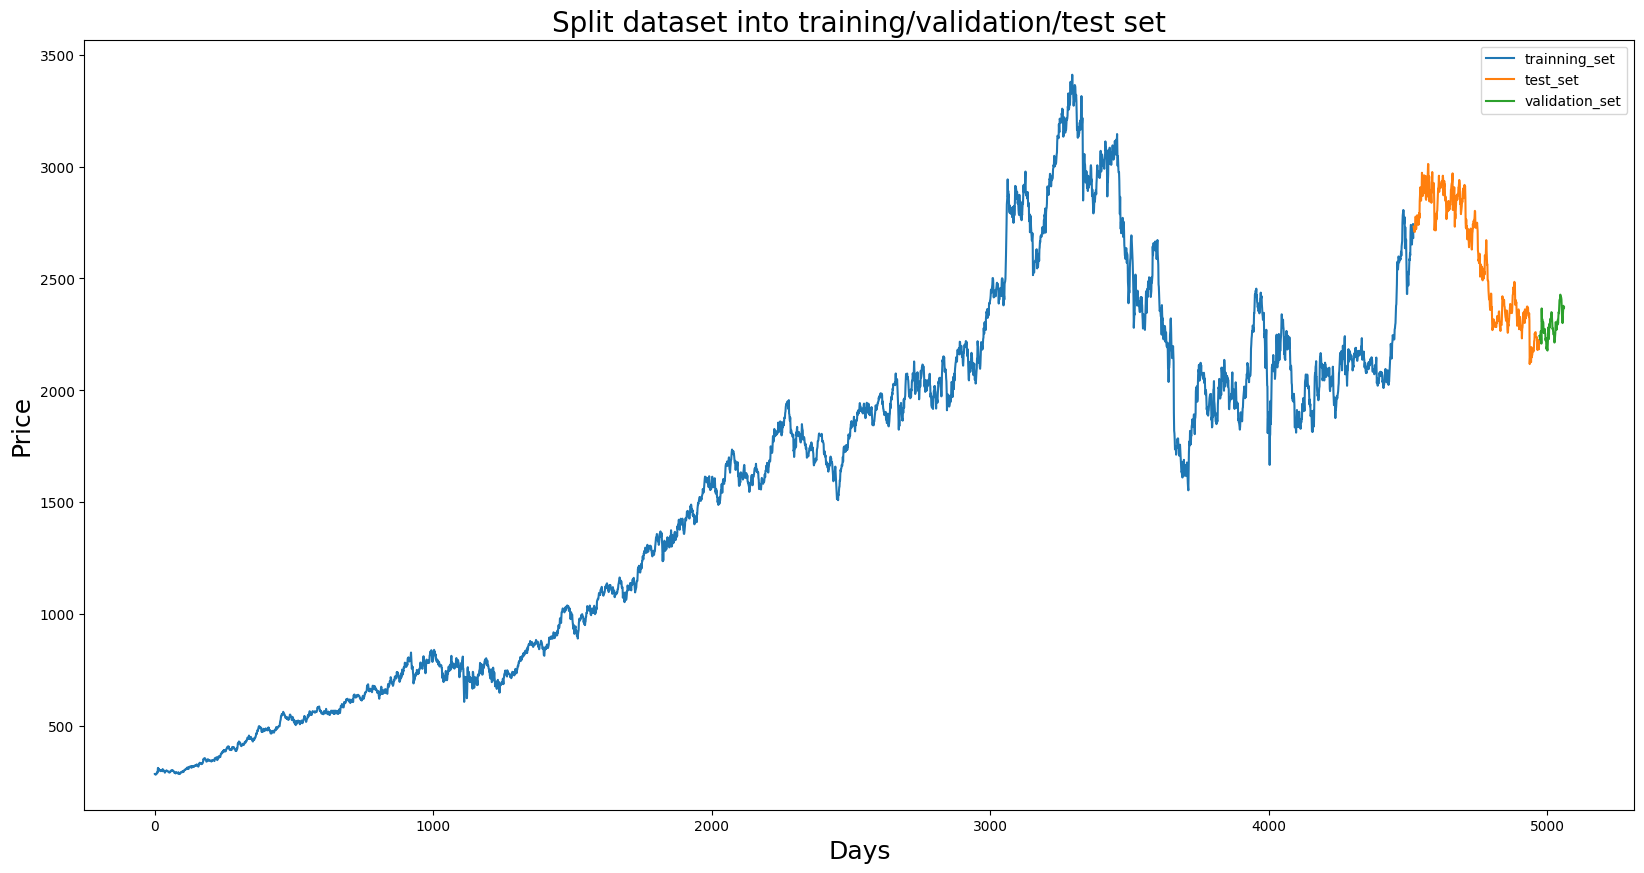

In [ ]:
#splitting train and test
x_train, y_train, x_test, y_test = split_Train_Test_DF(final_features_df, final_target_df)

#Visualizing the train, test and validation sets in single plot
#Starbucks
DataSet_Graph()

You can see the validation set is the most recent

### Support Vector Machines

In [ ]:
from sklearn.svm import SVR

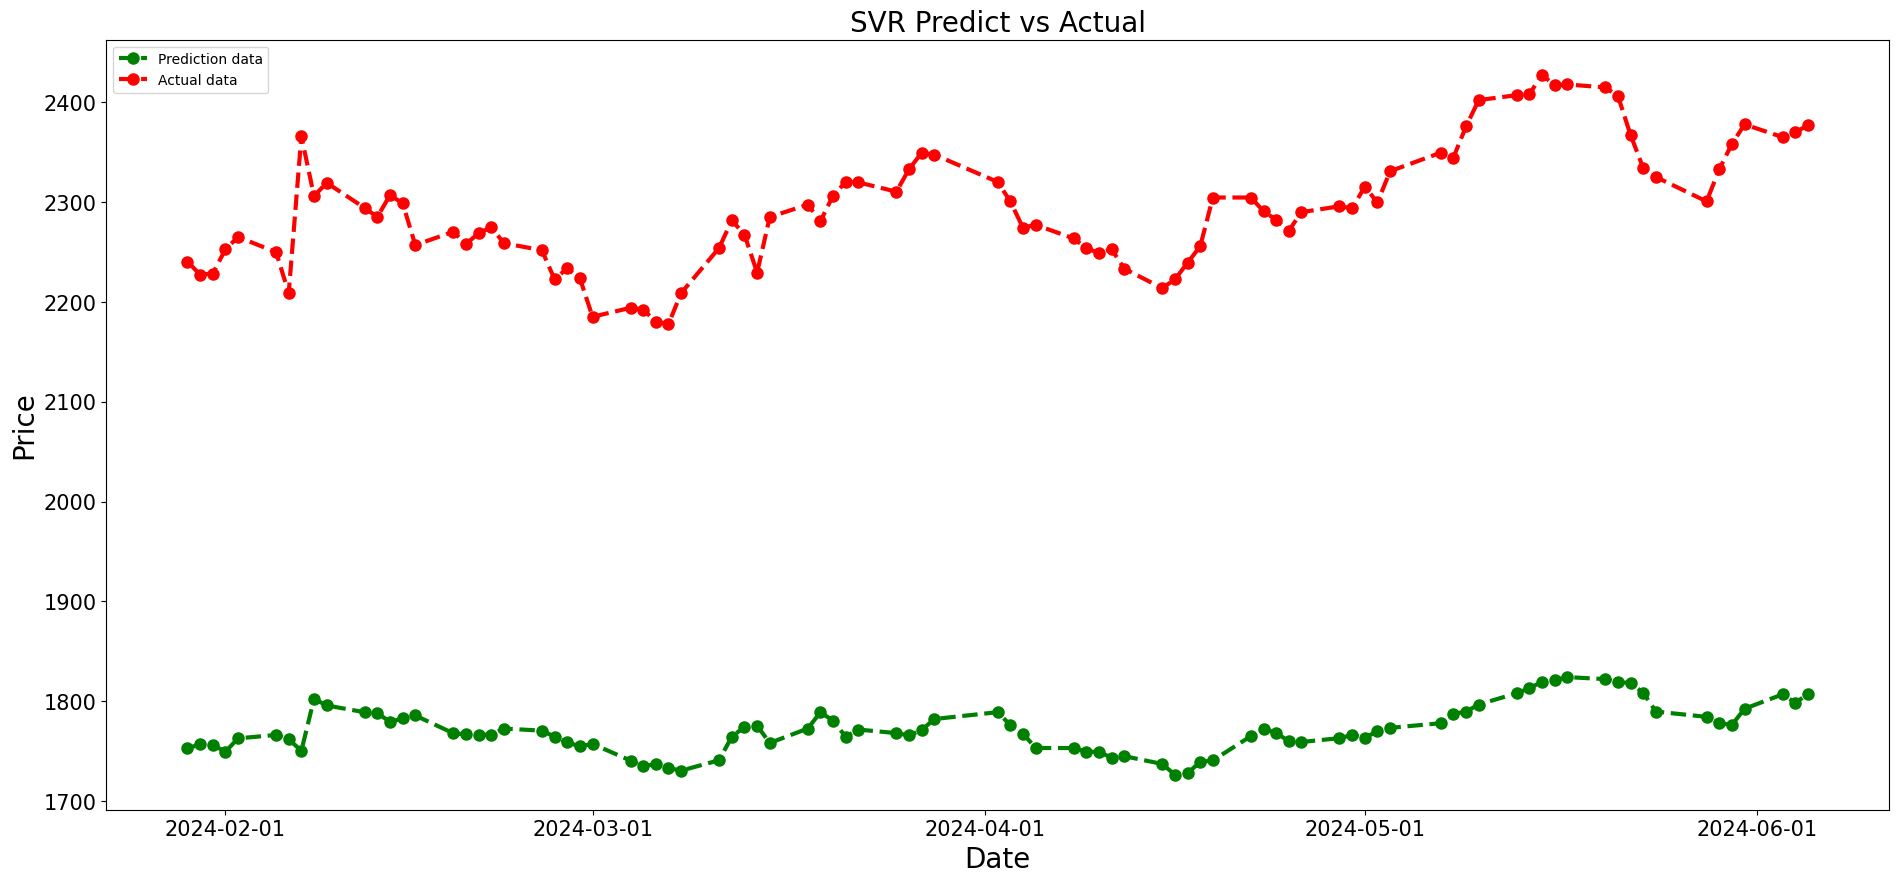

SVR RMSE:  524.7160134944248
SVR R2 score:  -74.07747193577765


In [ ]:
#SVR model
# Using the validation set
RMSE_Score, R2_Score = model_validateResult(model_SVR, model_name = "SVR")

{'C': 1000.0, 'epsilon': 0}
SVR_Best Model  RMSE:  338.36559237539296
SVR_Best Model  R2 score:  -0.6953292390423138


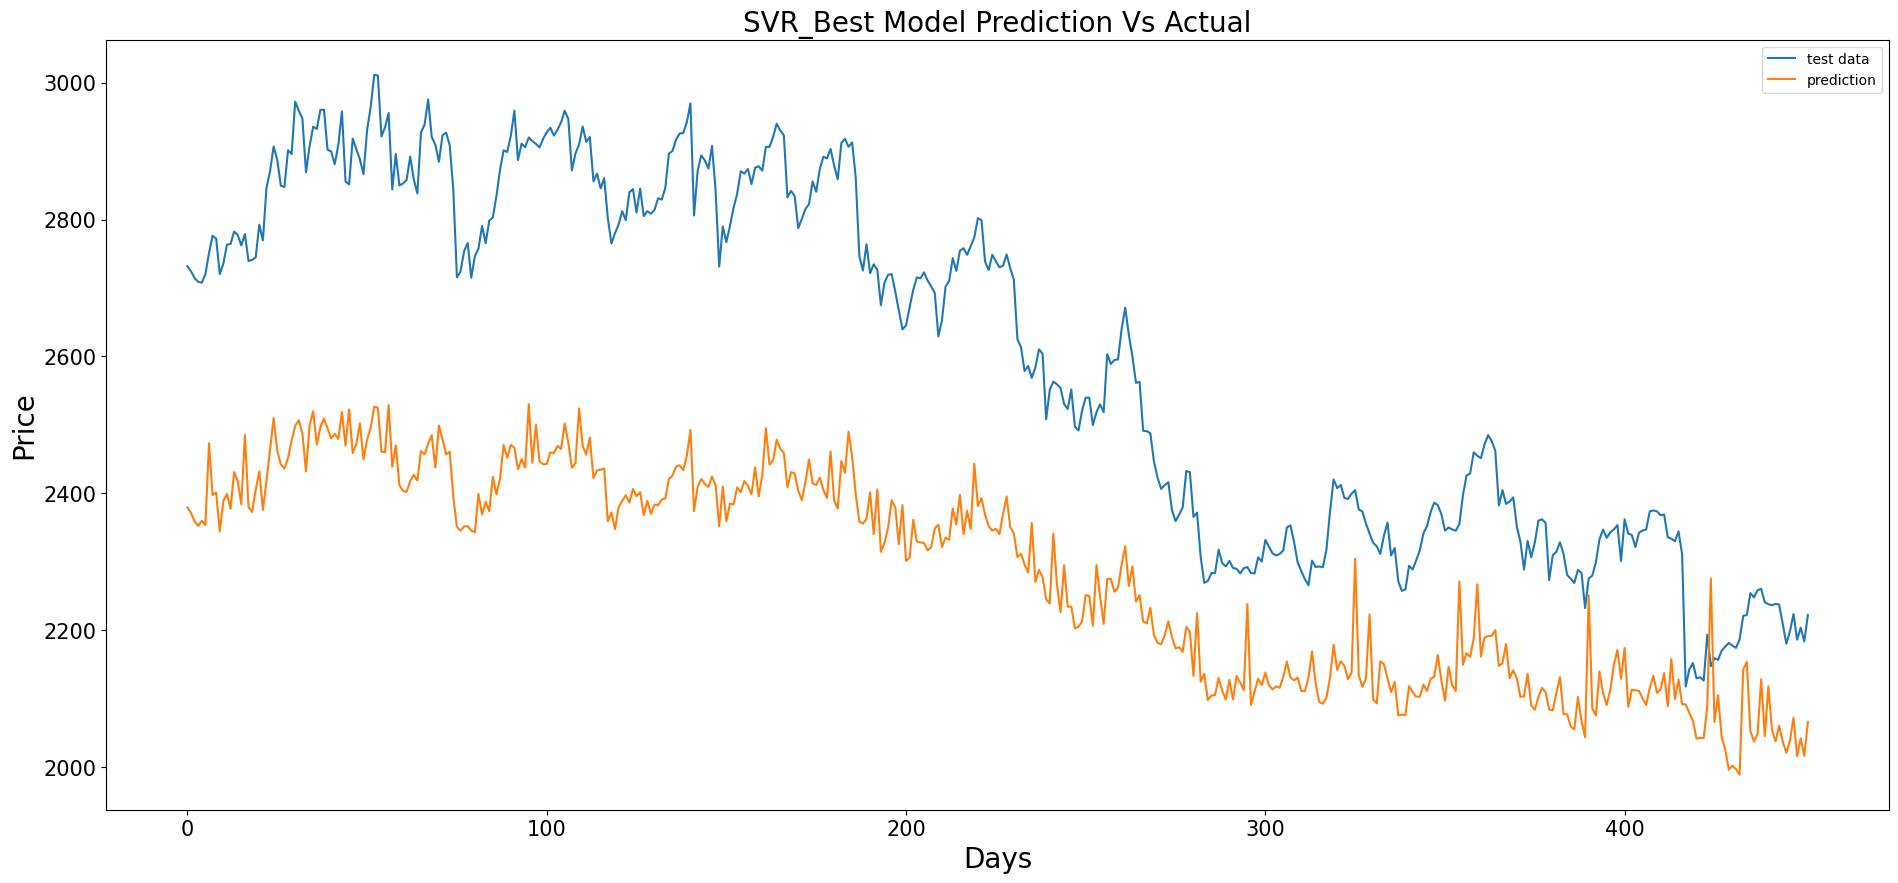

In [ ]:
#SVR_Tuning model validation with test data
RMSE_Score, R2_Score = bestModel_validateResult(model_SVRTuning, model_name = "SVR_Best Model ")

In [ ]:
value_Compare(model_SVRTuning)

{'C': 1000.0, 'epsilon': 0}


True_value  Predicted_value
0    2731.895996      2379.446207
1    2724.424805      2371.455259
2    2714.463623      2358.829293
3    2709.067627      2352.548186
4    2707.822266      2359.815243
..           ...              ...
447  2223.700195      2072.133066
448  2186.075195      2015.955978
449  2203.697021      2042.203941
450  2183.693604      2016.616271
451  2222.271484      2065.791096

[452 rows x 2 columns]

## Netflix SVR

In [ ]:
netflix.head()

Open      High       Low     Close  Adj Close    Volume  Days
Date                                                                         
2004-06-07  4.531429  4.610000  4.502857  4.585714   4.585714   8113000     1
2004-06-08  4.570000  4.635714  4.552857  4.572857   4.572857   3657500     2
2004-06-09  4.514286  4.517143  4.368571  4.471429   4.471429  15130500     3
2004-06-10  4.485714  4.521429  4.400000  4.455714   4.455714   3894100     4
2004-06-14  4.355714  4.357143  4.080000  4.221429   4.221429  16152500     5

In [ ]:
netflix.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Days         0
dtype: int64

In [ ]:
netflix.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Days           int64
dtype: object

<Axes: title={'center': 'Close price vs Adjusted close price for Netflix'}, xlabel='Date'>

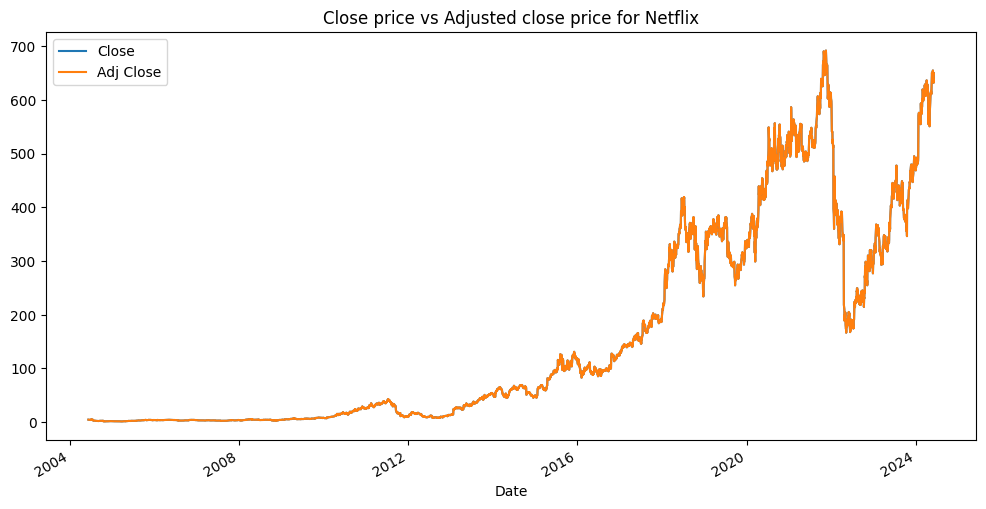

In [ ]:
fig = plt.figure(figsize=(12,6)) # Create figure object
ax = fig.add_subplot(1,1,1)

# Plot close and adjusted close on same plot
netflix.reset_index().plot(x='Date', y=['Close','Adj Close'], ax=ax, title = 'Close price vs Adjusted close price for Netflix')

Unlike the British American Tobacco dataset, Netflix close and adjusted close price are very similar, so in building the model, the close column will be dropped in order not to leak information to the model


In [ ]:
feature = netflix.drop(['Adj Close', 'Close'], axis=1) # Remove cols date and adjusted close
target = netflix['Adj Close'] # Target variable is the adj close

In [ ]:
feature.head()

Open      High       Low    Volume  Days
Date                                                    
2004-06-07  4.531429  4.610000  4.502857   8113000     1
2004-06-08  4.570000  4.635714  4.552857   3657500     2
2004-06-09  4.514286  4.517143  4.368571  15130500     3
2004-06-10  4.485714  4.521429  4.400000   3894100     4
2004-06-14  4.355714  4.357143  4.080000  16152500     5

In [ ]:
# calling the normalizing function defined above is the first step
normalized_features_df = normalize_featuresDF(feature)
target_df = target

In [ ]:
#Splitting validation sets from the whole dataset, the length has already been defined in the
# function as 90, which will be the data from the last 90 days in the data
validation_x, validation_y = split_ValidationSet(normalized_features_df, target_df)

#Now returning features and targets left after removing the validation sets

final_features_df, final_target_df = split_Final_df(normalized_features_df, target_df)

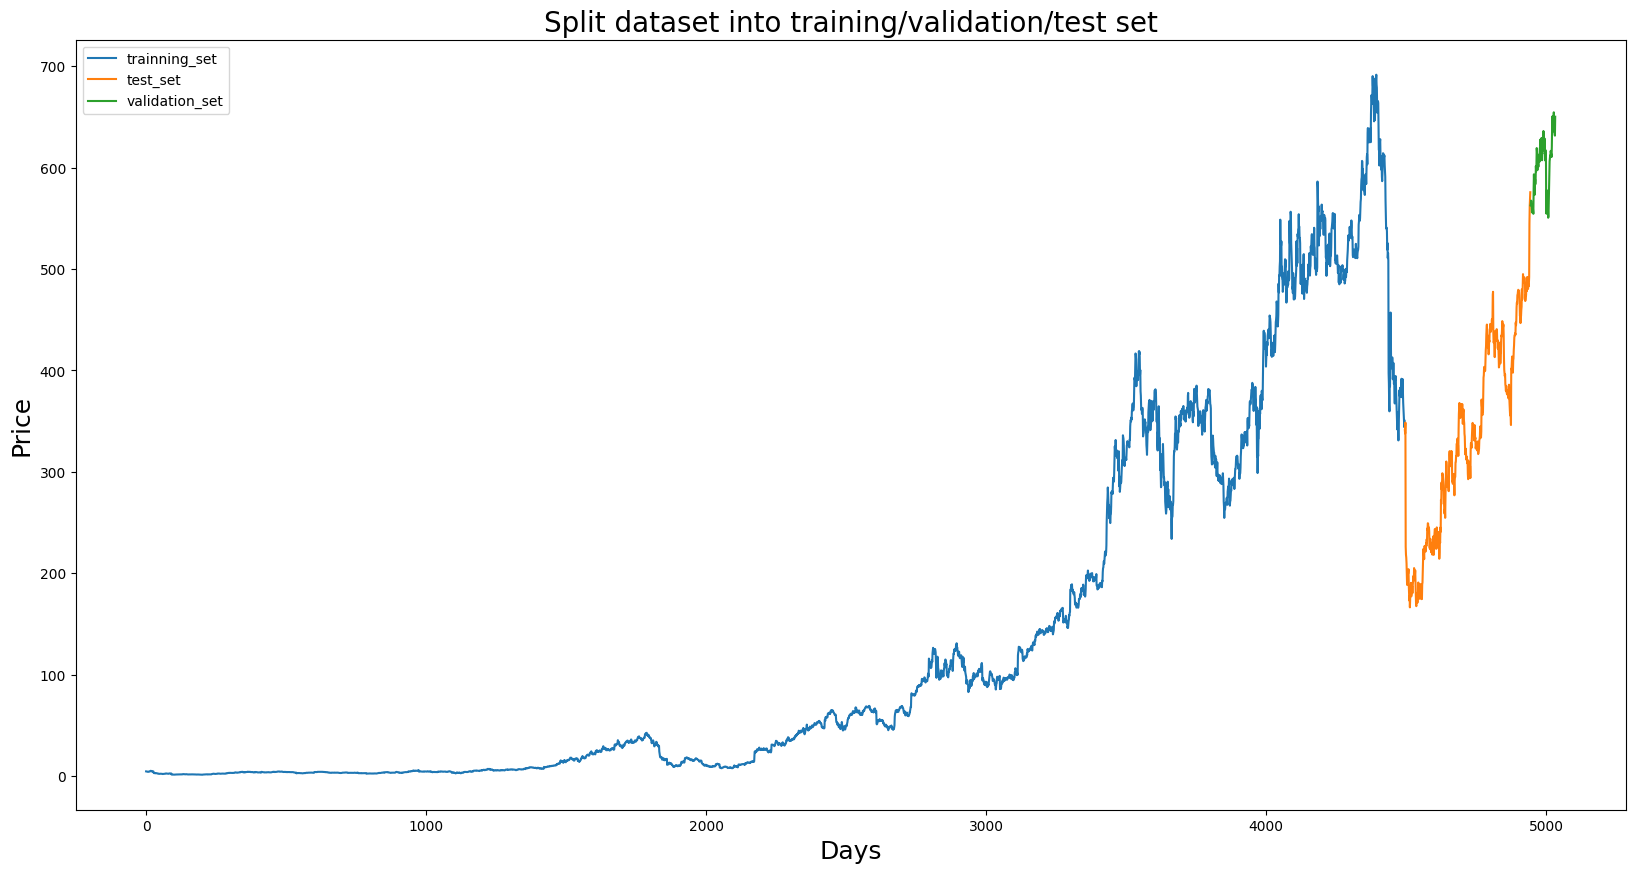

In [ ]:
#splitting train and test
x_train, y_train, x_test, y_test = split_Train_Test_DF(final_features_df, final_target_df)

#Visualizing the train, test and validation sets in single plot
#Starbucks
DataSet_Graph()

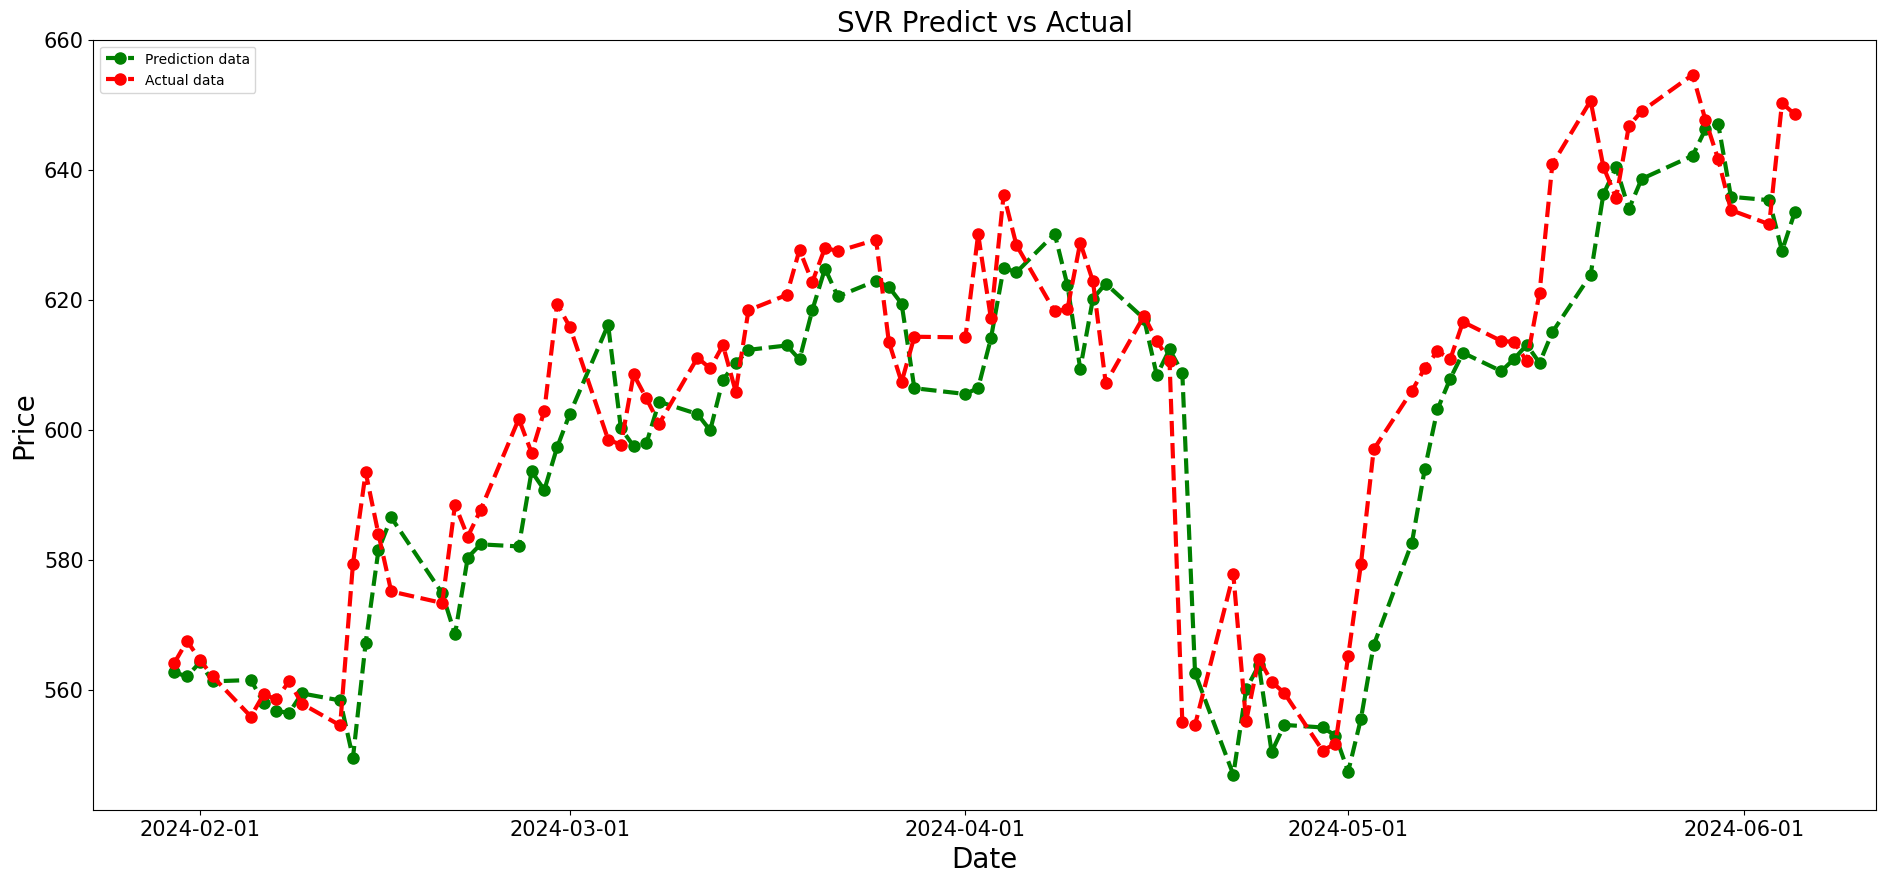

SVR RMSE:  13.457349929687272
SVR R2 score:  0.7832435093053746


In [ ]:
#SVR model
# Using the validation set
RMSE_Score, R2_Score = model_validateResult(model_SVR, model_name = "SVR")

{'C': 1000.0, 'epsilon': 0}
SVR_Best Model  RMSE:  3.0998783388474607
SVR_Best Model  R2 score:  0.9989718231016036


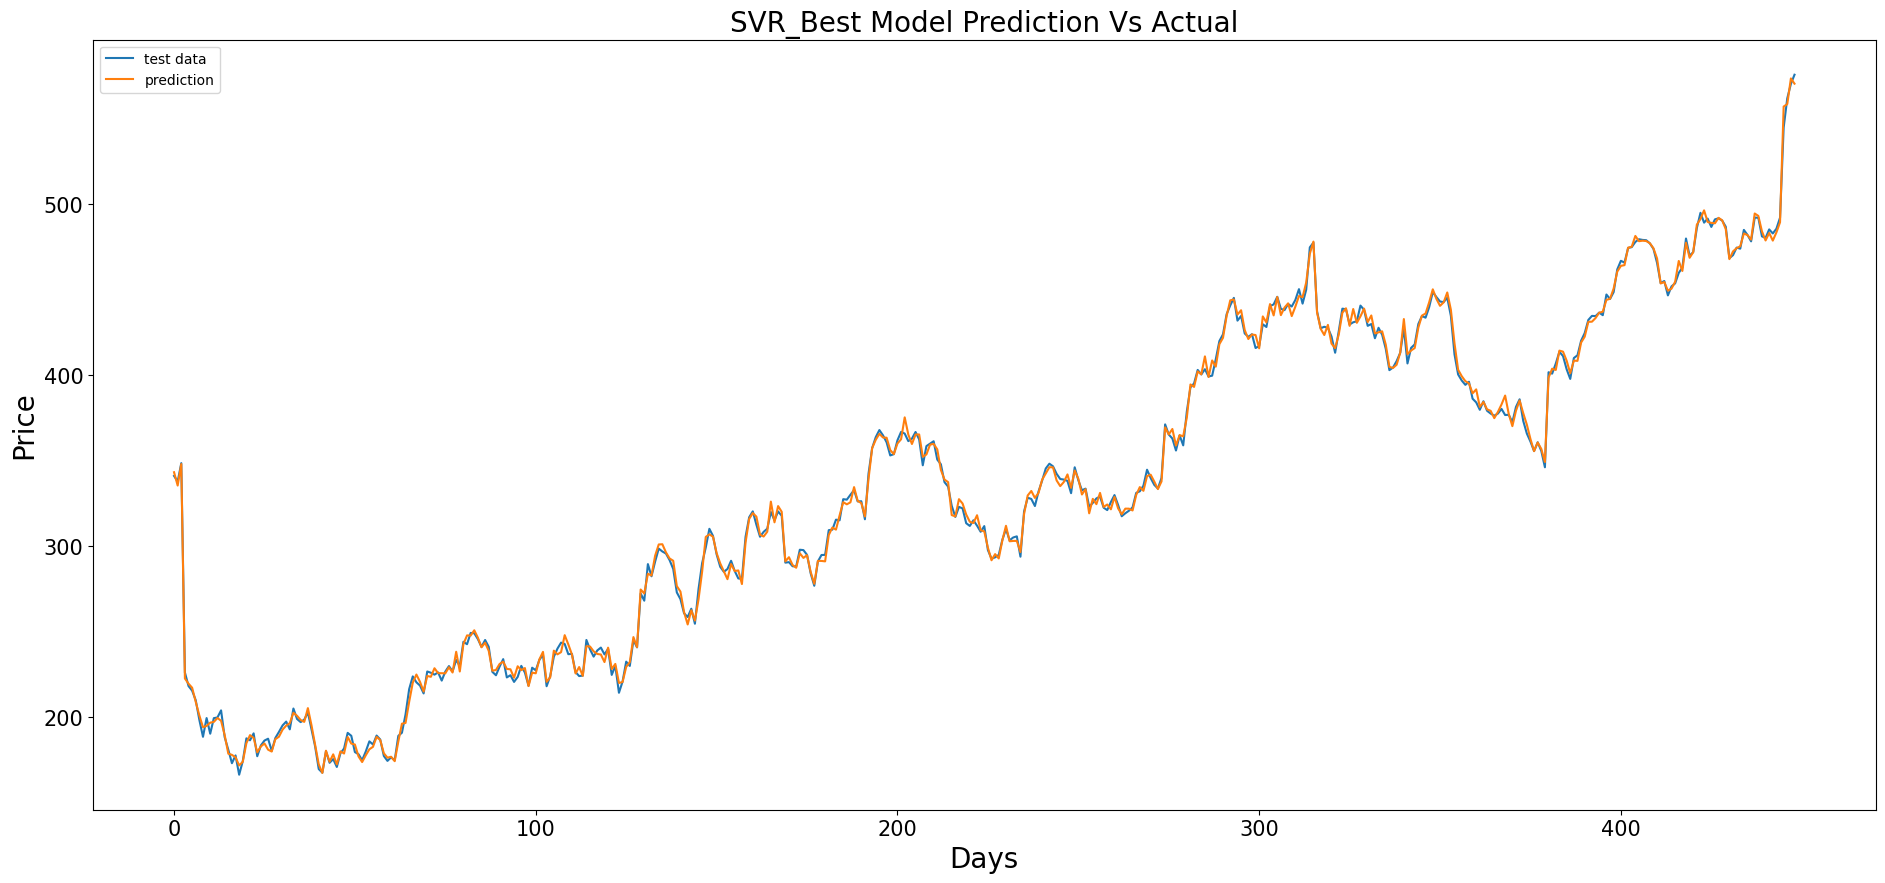

In [ ]:
#SVR_Tuning model validation with test data
RMSE_Score, R2_Score = bestModel_validateResult(model_SVRTuning, model_name = "SVR_Best Model ")

### Tesla SVR

In [ ]:
tesla.head()

Open      High       Low     Close  Adj Close     Volume  Days
Date                                                                          
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500     1
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500     2
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000     3
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000     4
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500     5

In [ ]:
tesla.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Days         0
dtype: int64

<Axes: title={'center': 'Close price vs Adjusted close price for Tesla'}, xlabel='Date'>

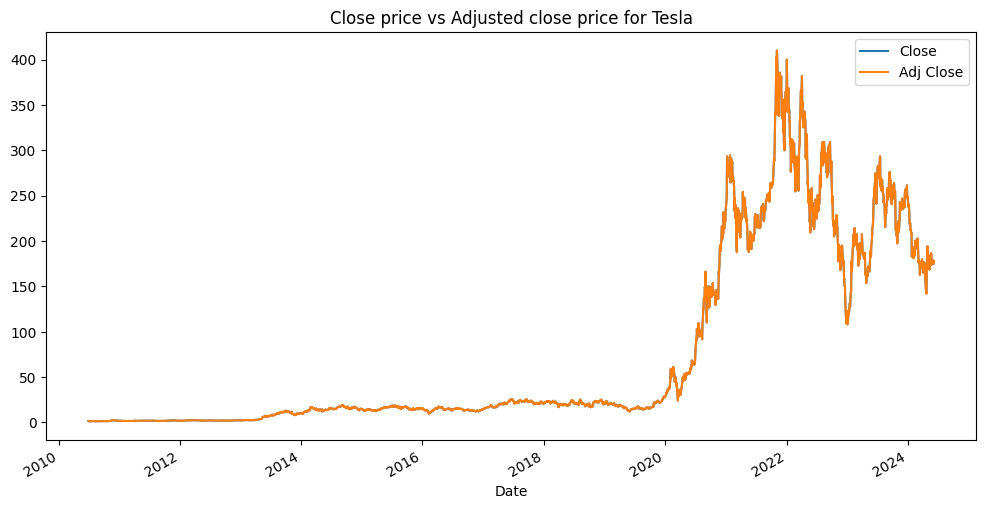

In [ ]:
fig = plt.figure(figsize=(12,6)) # Create figure object
ax = fig.add_subplot(1,1,1)

# Plot close and adjusted close on same plot
tesla.reset_index().plot(x='Date', y=['Close','Adj Close'], ax=ax, title = 'Close price vs Adjusted close price for Tesla')

Same as tesla, almost similar

In [ ]:
feature = tesla.drop(['Adj Close', 'Close'], axis=1) # Remove cols close and adjusted close
target = tesla['Adj Close'] # Target variable is the adj close

In [ ]:
feature.head()

Open      High       Low     Volume  Days
Date                                                     
2010-06-29  1.266667  1.666667  1.169333  281494500     1
2010-06-30  1.719333  2.028000  1.553333  257806500     2
2010-07-01  1.666667  1.728000  1.351333  123282000     3
2010-07-02  1.533333  1.540000  1.247333   77097000     4
2010-07-06  1.333333  1.333333  1.055333  103003500     5

In [ ]:
target.head()

Date
2010-06-29    1.592667
2010-06-30    1.588667
2010-07-01    1.464000
2010-07-02    1.280000
2010-07-06    1.074000
Name: Adj Close, dtype: float64

In [ ]:
# calling the normalizing function defined above is the first step
normalized_features_df = normalize_featuresDF(feature)
target_df = target

In [ ]:
#Splitting validation sets from the whole dataset, the length has already been defined in the
# function as 90, which will be the data from the last 90 days in the data
validation_x, validation_y = split_ValidationSet(normalized_features_df, target_df)

#Now returning features and targets left after removing the validation sets

final_features_df, final_target_df = split_Final_df(normalized_features_df, target_df)

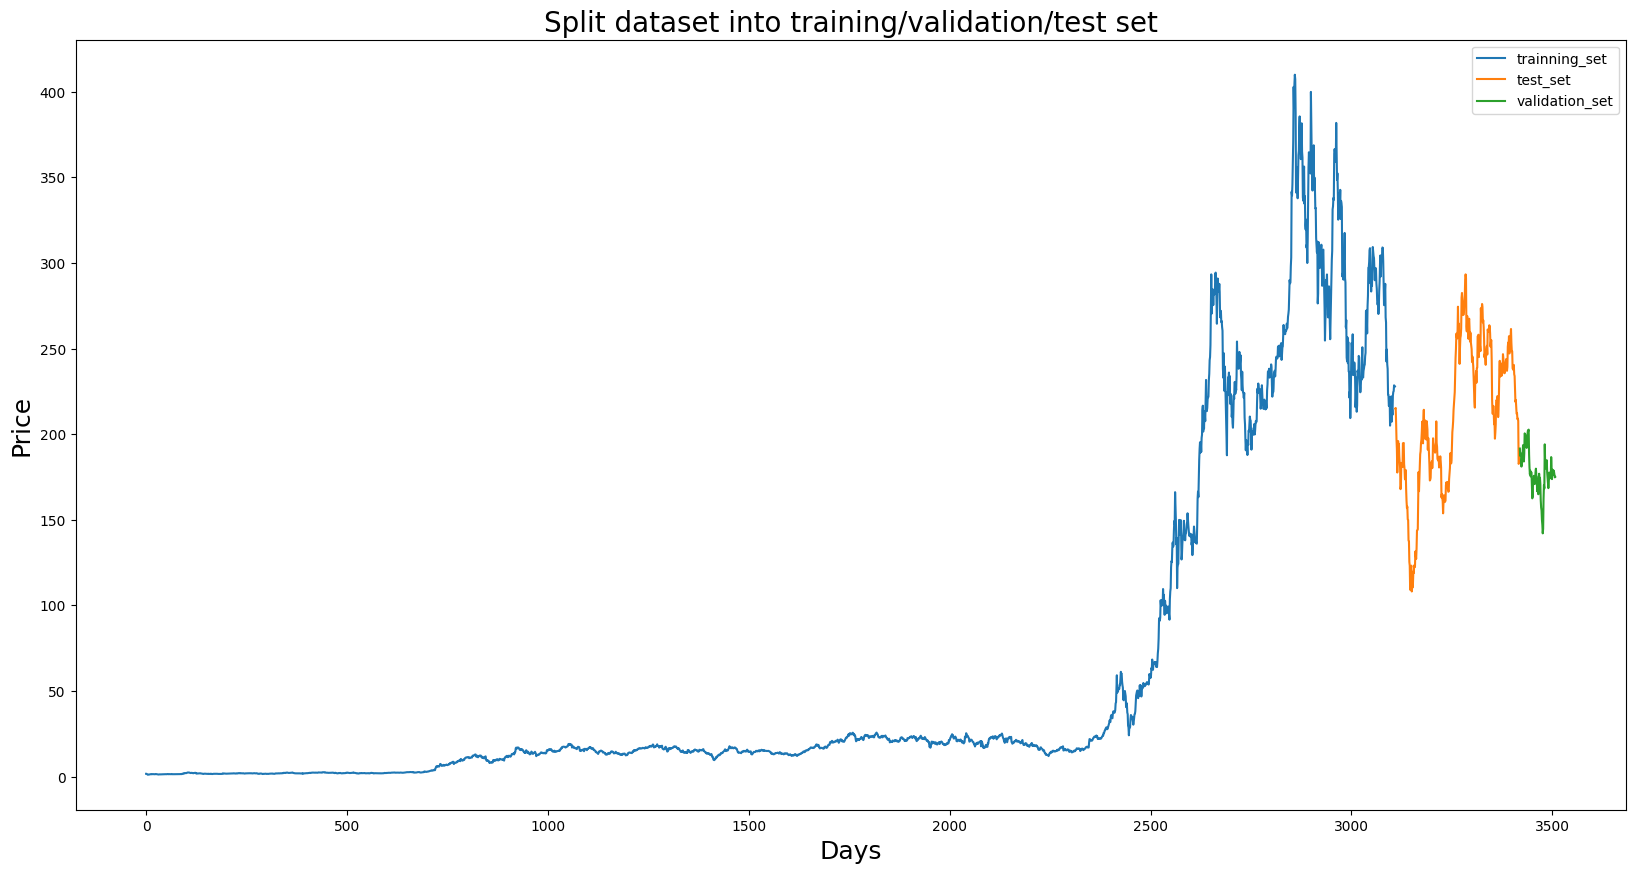

In [ ]:
#splitting train and test
x_train, y_train, x_test, y_test = split_Train_Test_DF(final_features_df, final_target_df)

#Visualizing the train, test and validation sets in single plot
#Starbucks
DataSet_Graph()

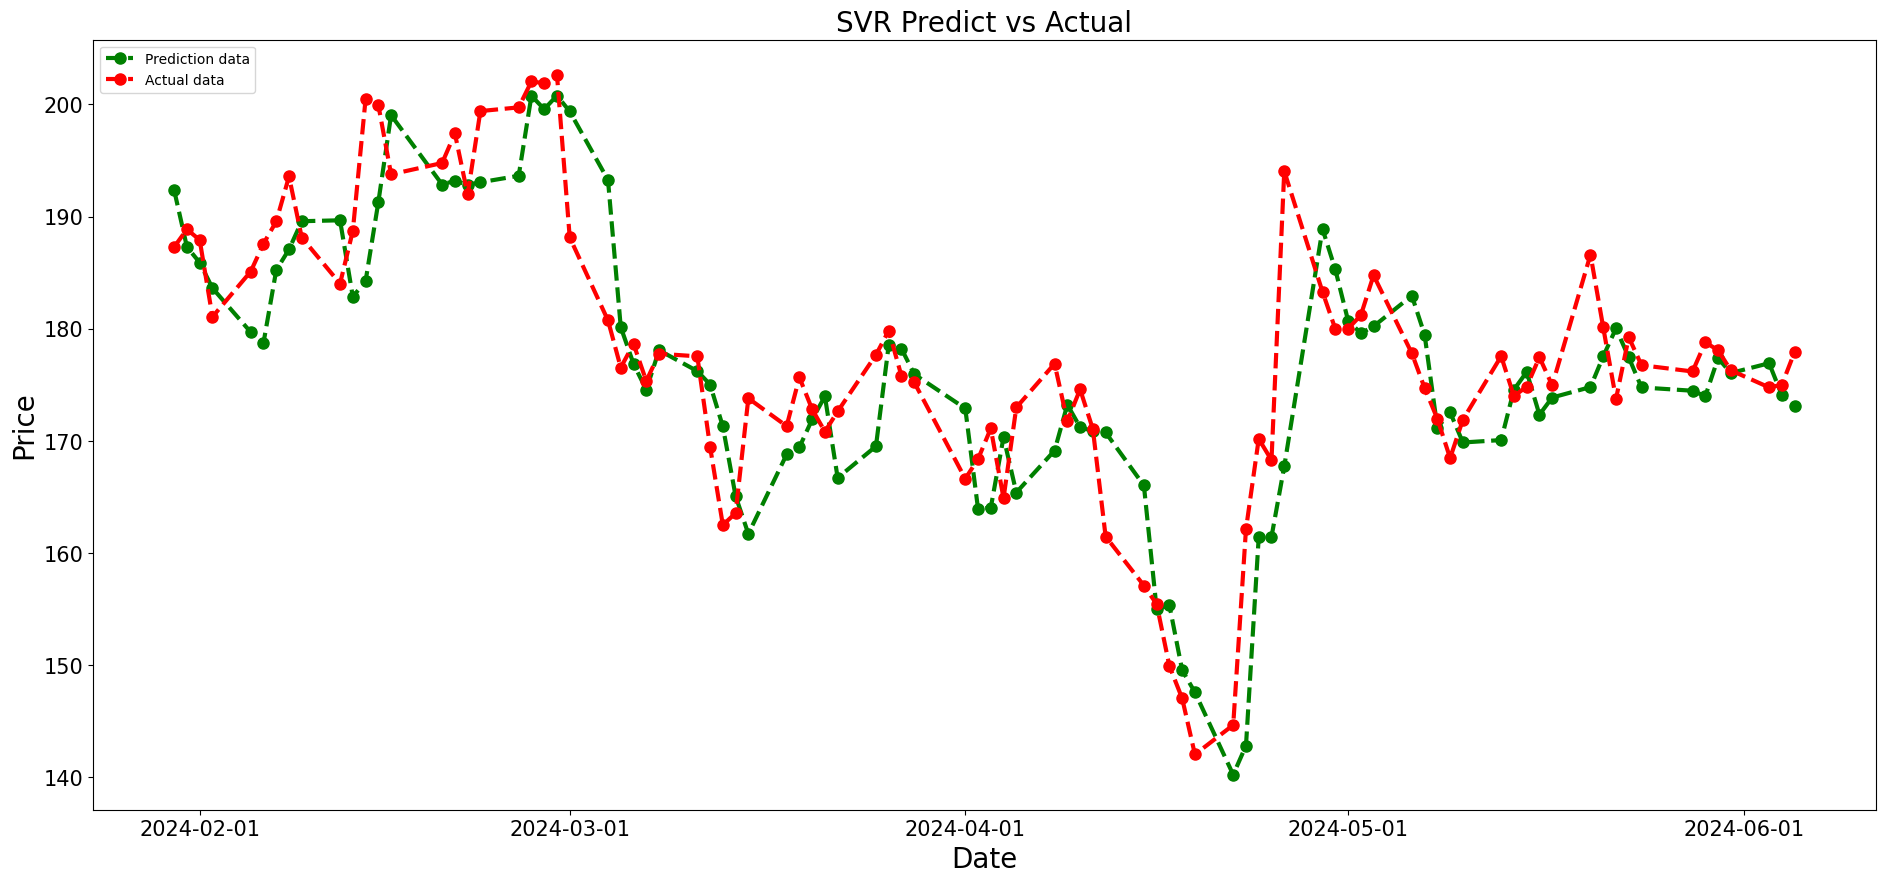

SVR RMSE:  6.42274004549609
SVR R2 score:  0.7321841171284995


In [ ]:
#SVR model
# Using the validation set
RMSE_Score, R2_Score = model_validateResult(model_SVR, model_name = "SVR")

{'C': 1000.0, 'epsilon': 0}
SVR_Best Model  RMSE:  2.427371398993434
SVR_Best Model  R2 score:  0.9967002901350138


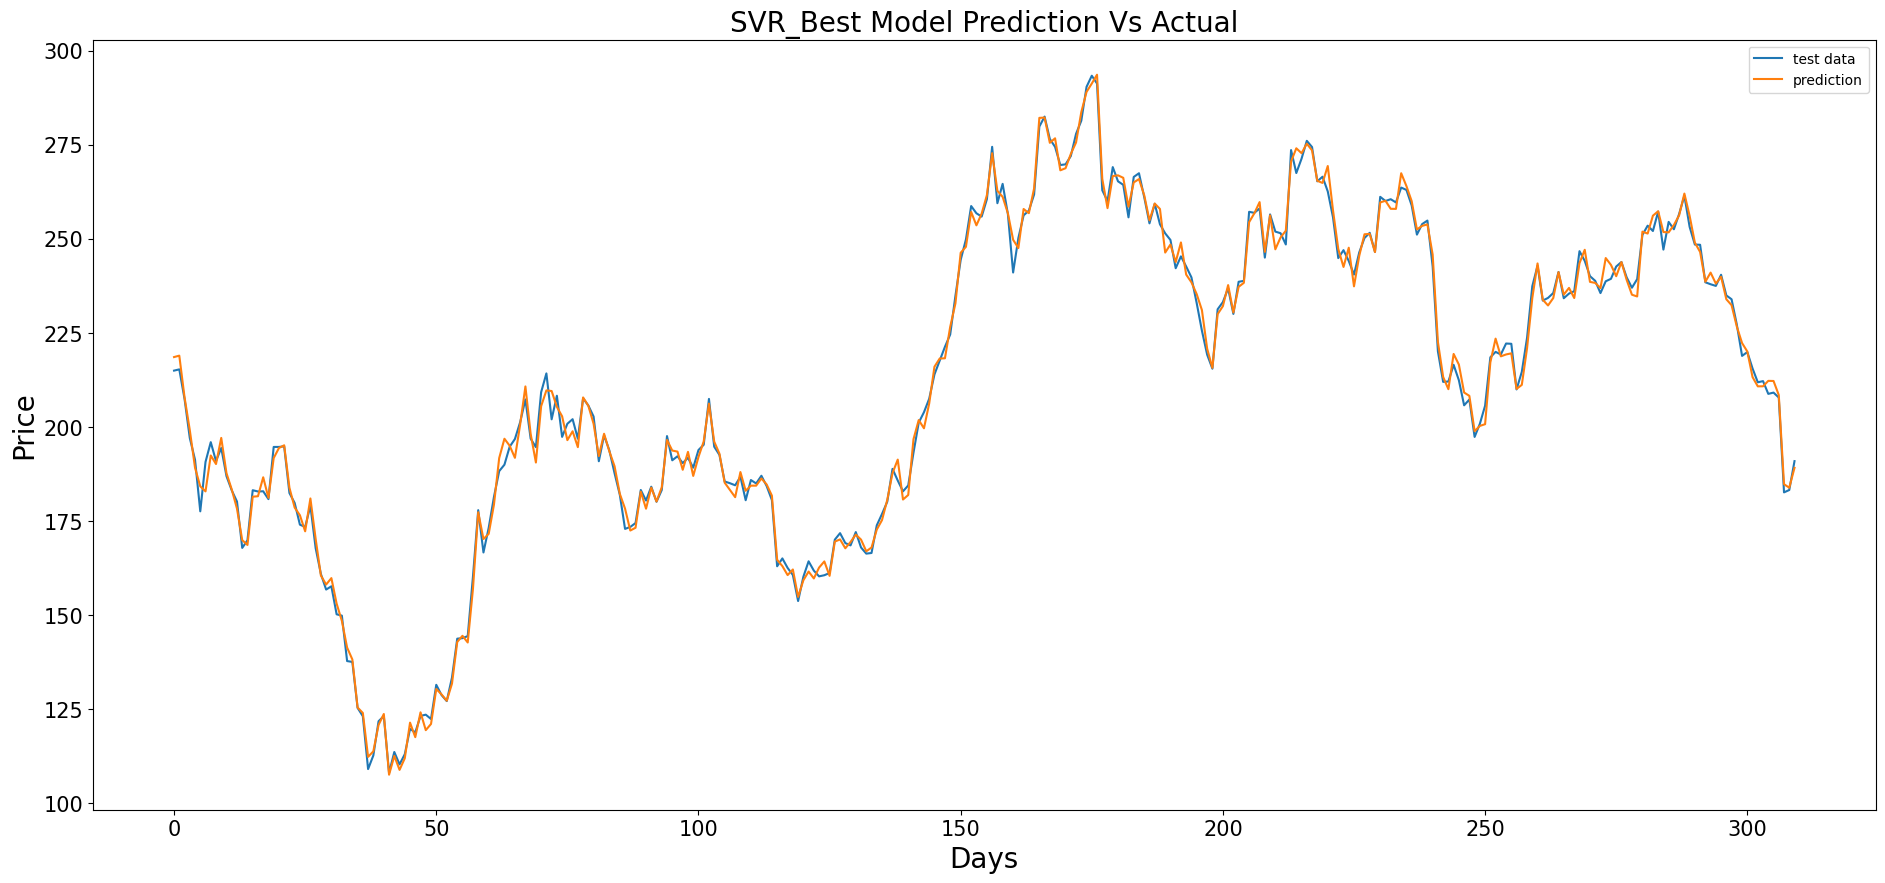

In [ ]:
#SVR_Tuning model validation with test data
RMSE_Score, R2_Score = bestModel_validateResult(model_SVRTuning, model_name = "SVR_Best Model ")

### The model works perfectly on the netflix and tesla datasets, and performed awfully on the british american tobacco dataset

# LSTM

In [ ]:
import tensorflow
import yfinance as yf
import pandas as pd
import numpy as np
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error
import math

def create_sequences(data, target, sequence_length):
    sequences = [] # A  list to hold sequences of features
    targets = [] #A list to hold sta
    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length][features].values
        target_value = data[target].iloc[i + sequence_length]
        sequences.append(seq)
        targets.append(target_value)
    return np.array(sequences), np.array(targets)

def preprocess_data(df, features, target, sequence_length):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[features + [target]])

    scaled_df = pd.DataFrame(scaled_data, columns=features + [target])

    X, y = create_sequences(scaled_df, target, sequence_length)

    return X, y, scaler, df

def build_lstm_model(sequence_length, num_features):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, num_features)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_lstm_model(model, X_train, y_train, batch_size, epochs):
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
    return model, history

def evaluate_lstm_model(model, X_train, y_train, X_test, y_test, scaler, df, sequence_length, features):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    X_train_last = X_train[:, -1, :]
    X_test_last = X_test[:, -1, :]

    train_predictions_full = np.hstack((X_train_last, train_predictions))
    test_predictions_full = np.hstack((X_test_last, test_predictions))

    train_predictions_inverse = scaler.inverse_transform(train_predictions_full)[:, -1]
    test_predictions_inverse = scaler.inverse_transform(test_predictions_full)[:, -1]

    y_train_actual = scaler.inverse_transform(np.hstack((X_train_last, y_train.reshape(-1, 1))))[:, -1]
    y_test_actual = scaler.inverse_transform(np.hstack((X_test_last, y_test.reshape(-1, 1))))[:, -1]

    train_rmse = math.sqrt(mean_squared_error(y_train_actual, train_predictions_inverse))
    test_rmse = math.sqrt(mean_squared_error(y_test_actual, test_predictions_inverse))

    print('Train RMSE: ', train_rmse)
    print('Test RMSE: ', test_rmse)

    plt.figure(figsize=(23, 10))
    train_idx = df.index[sequence_length:sequence_length+len(y_train_actual)]
    test_idx = df.index[sequence_length+len(y_train_actual):sequence_length+len(y_train_actual)+len(y_test_actual)]

    plt.plot(train_idx, y_train_actual, color='red', linestyle='dashed', linewidth=3,
             marker='o', markerfacecolor='red', markersize=8, label='Train Actual')
    plt.plot(train_idx, train_predictions_inverse, color='green', linestyle='dashed', linewidth=3,
             marker='o', markerfacecolor='green', markersize=8, label='Train Prediction')
    plt.plot(test_idx, y_test_actual, color='blue', linestyle='dashed', linewidth=3,
             marker='o', markerfacecolor='blue', markersize=8, label='Test Actual')
    plt.plot(test_idx, test_predictions_inverse, color='orange', linestyle='dashed', linewidth=3,
             marker='o', markerfacecolor='orange', markersize=8, label='Test Prediction')

    plt.ylabel('Price', fontsize=20)
    plt.xlabel('Date', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('LSTM Predict vs Actual', fontsize=20)
    plt.legend(loc='upper left')
    plt.show()

British American Tobacco

32/32 [==============================] - 1s 17ms/step
Train RMSE:  103.0205033507096
Test RMSE:  221.49476594250086


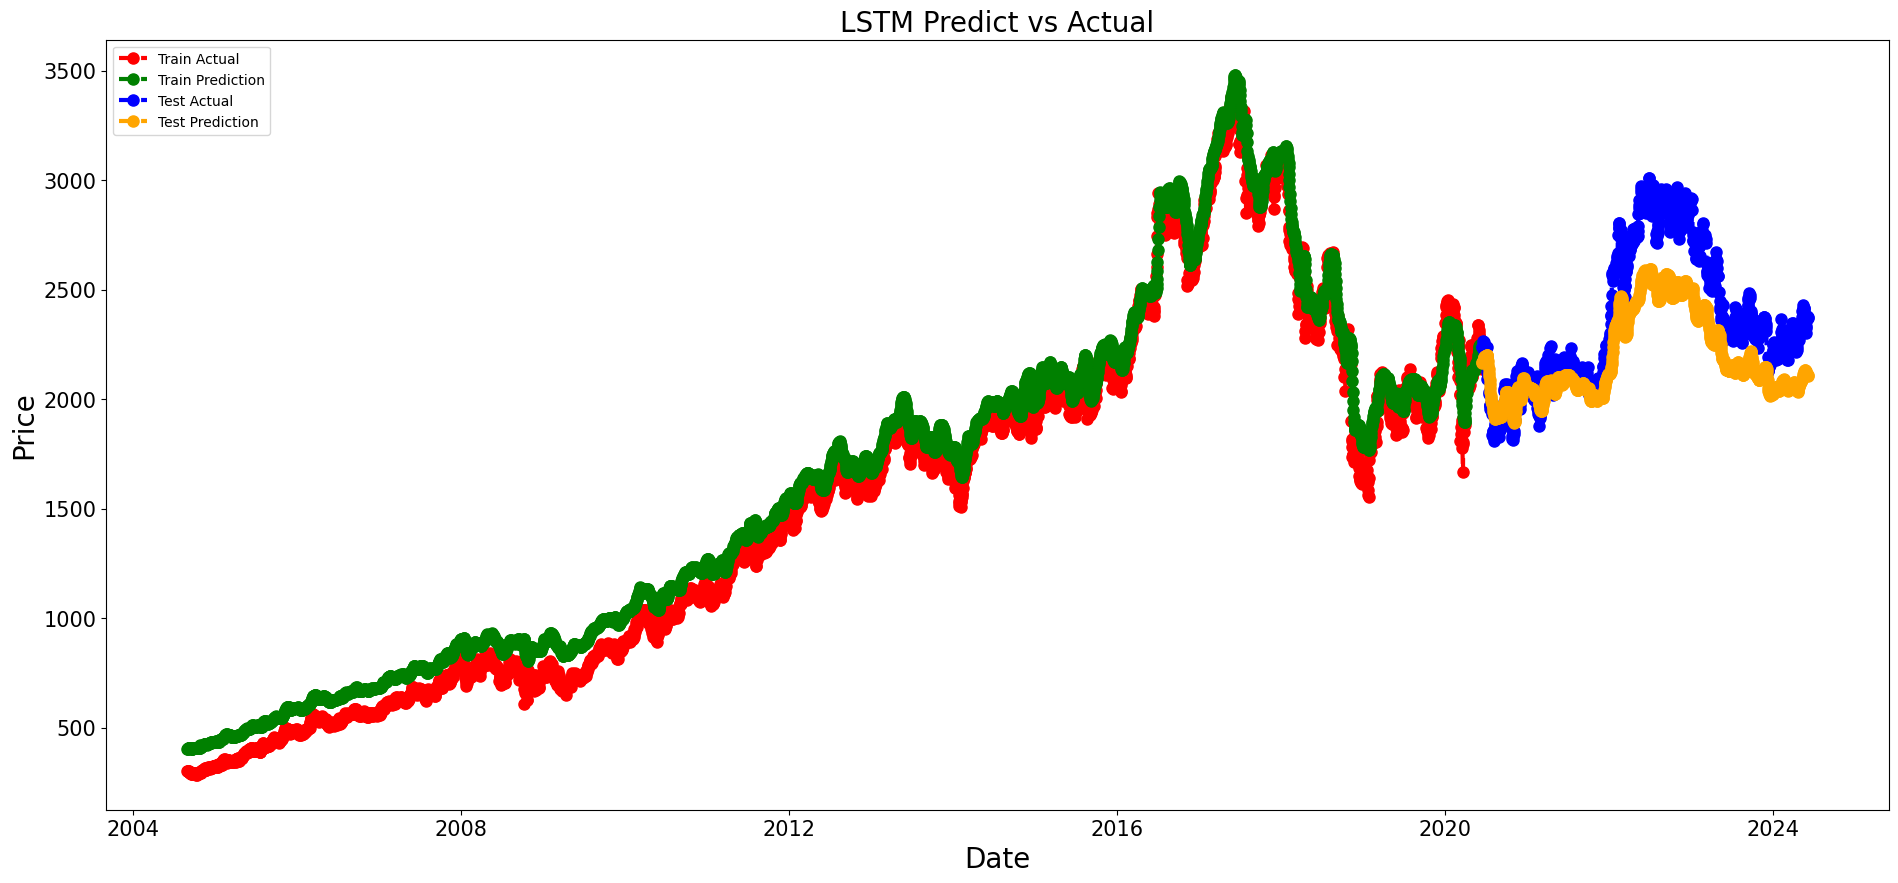

In [ ]:
# Define parameters
features = ['Open', 'High', 'Low', 'Volume', 'Days']  # example features
target = 'Adj Close'
sequence_length = 60
batch_size = 1
epochs = 1

# Preprocess the data
X, y, scaler, df = preprocess_data(batsl, features, target, sequence_length)

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = build_lstm_model(sequence_length, len(features))

# Train the LSTM model
model, history = train_lstm_model(model, X_train, y_train, batch_size, epochs)

# Evaluate the LSTM model
evaluate_lstm_model(model, X_train, y_train, X_test, y_test, scaler, df, sequence_length, features)


Netflix

32/32 [==============================] - 1s 20ms/step
Train RMSE:  8.598097499741174
Test RMSE:  43.74792499341104


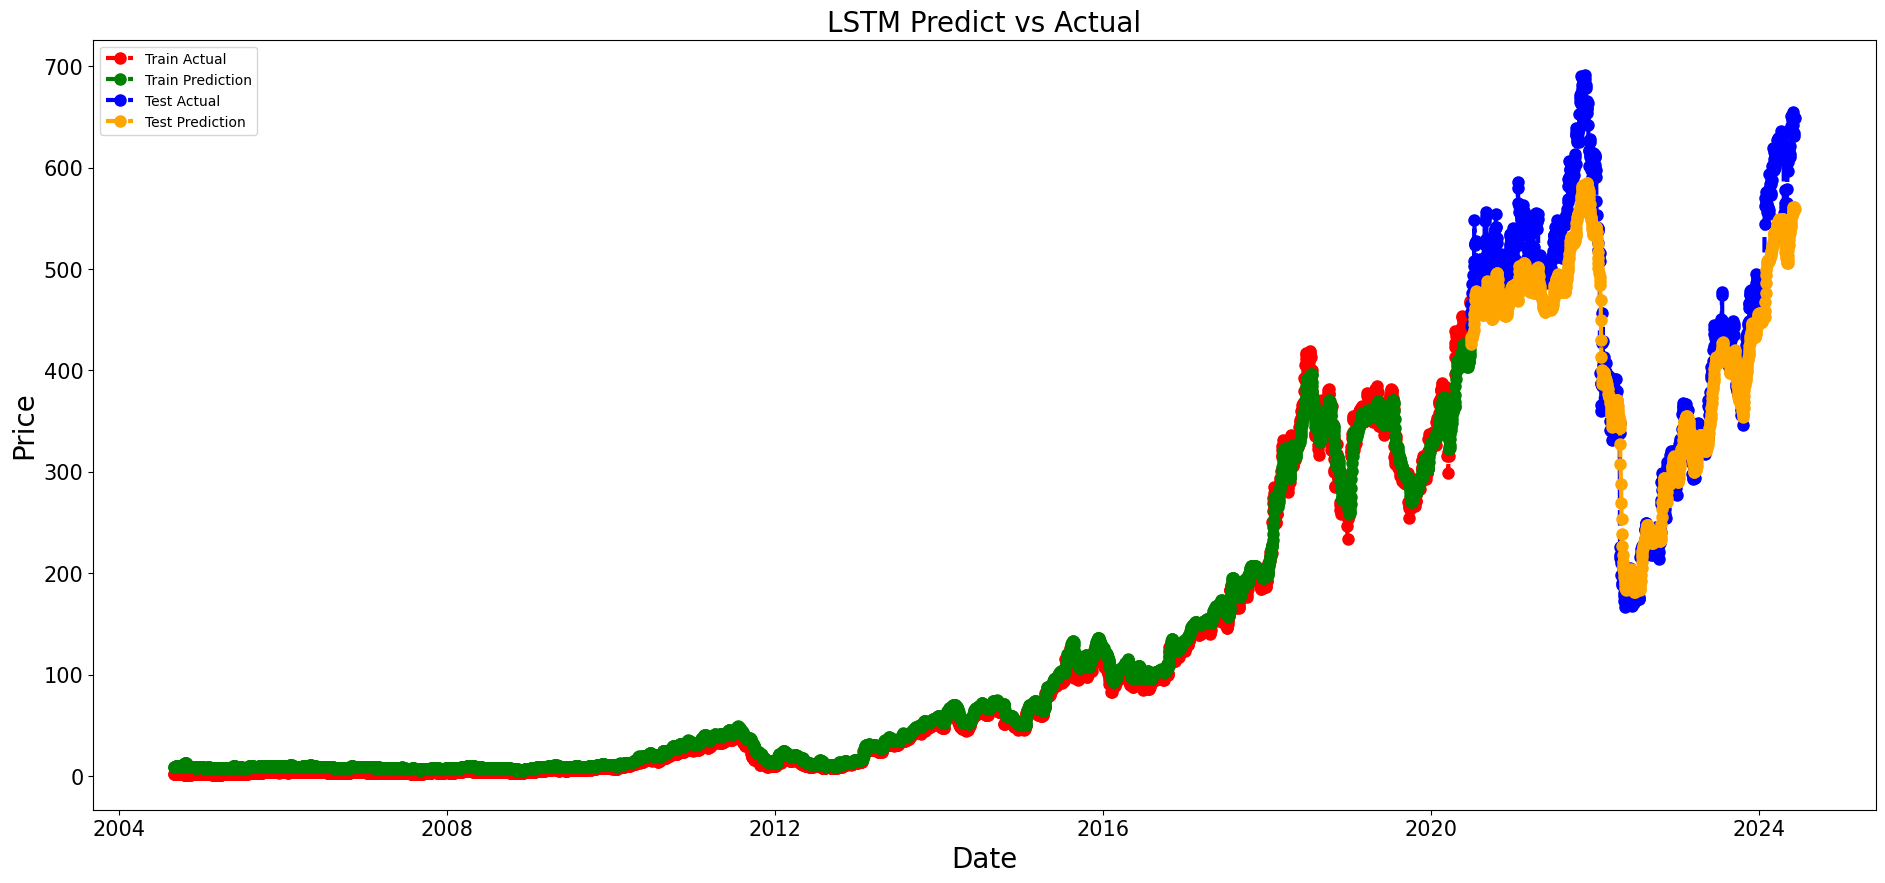

In [ ]:
# Define parameters
features = ['Open', 'High', 'Low', 'Volume', 'Days']  # example features
target = 'Adj Close'
sequence_length = 60
batch_size = 1
epochs = 1

# Preprocess the data
X, y, scaler, df = preprocess_data(netflix, features, target, sequence_length)

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = build_lstm_model(sequence_length, len(features))

# Train the LSTM model
model, history = train_lstm_model(model, X_train, y_train, batch_size, epochs)

# Evaluate the LSTM model
evaluate_lstm_model(model, X_train, y_train, X_test, y_test, scaler, df, sequence_length, features)

Tesla

22/22 [==============================] - 0s 17ms/step
Train RMSE:  4.867996811743334
Test RMSE:  20.75364115643673


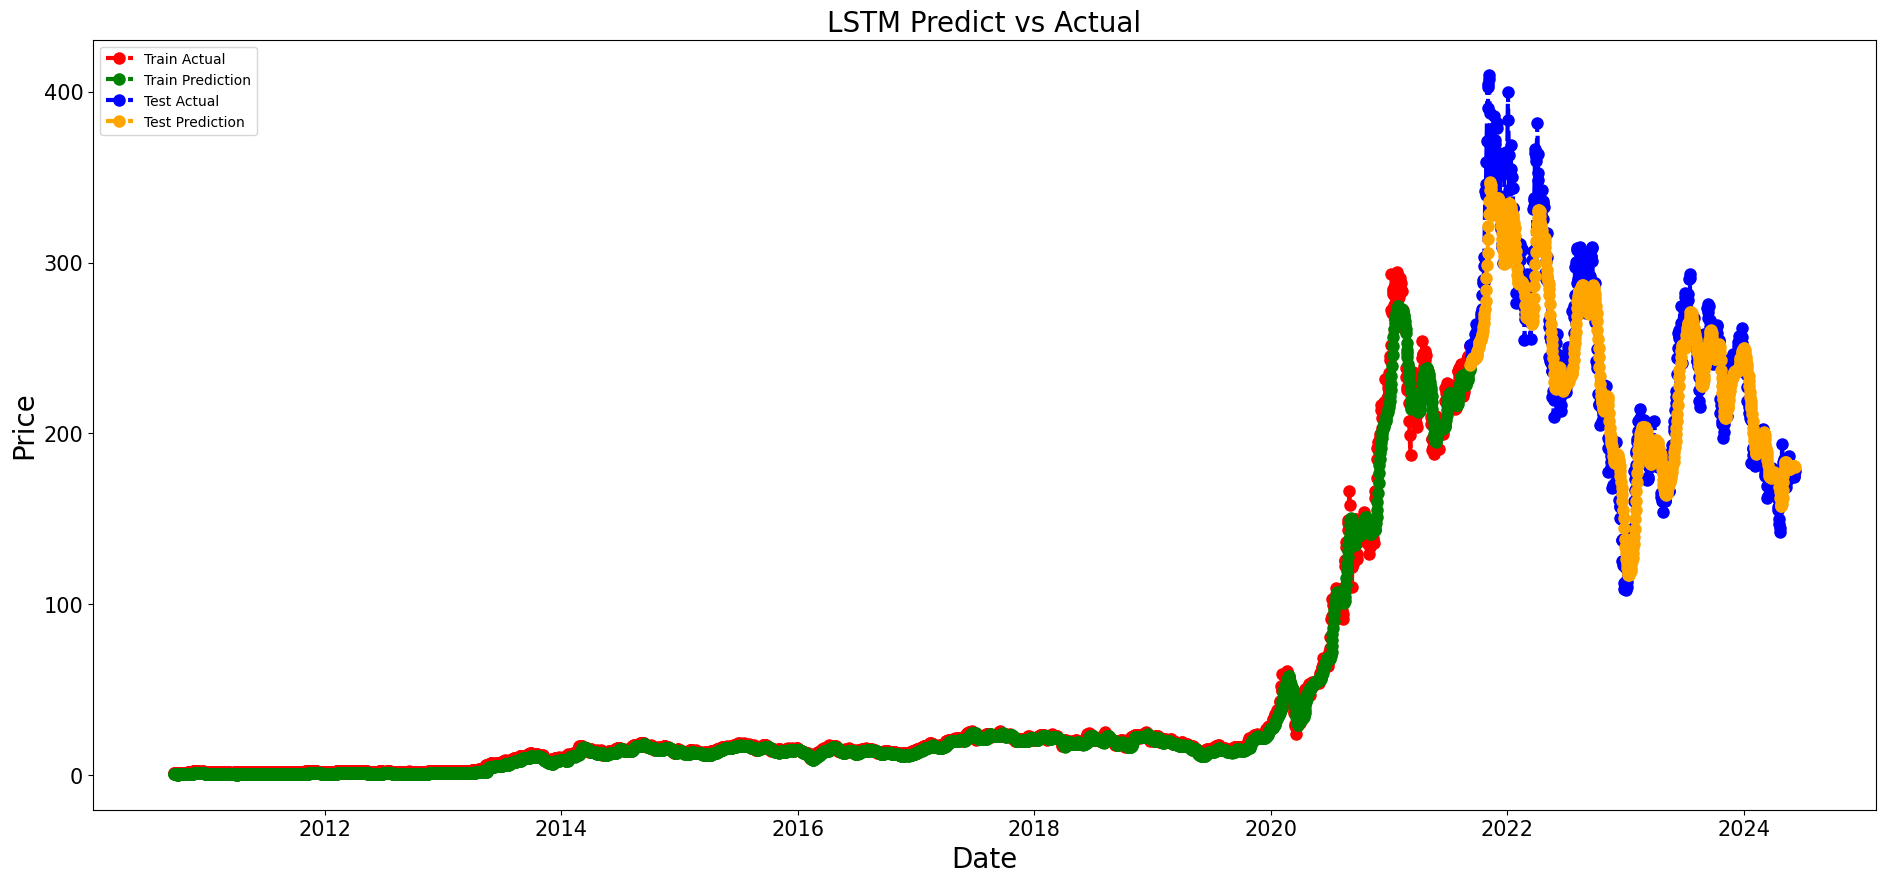

In [ ]:
# Define parameters
features = ['Open', 'High', 'Low', 'Volume', 'Days']  # example features
target = 'Adj Close'
sequence_length = 60
batch_size = 1
epochs = 1

# Preprocess the data
X, y, scaler, df = preprocess_data(tesla, features, target, sequence_length)

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = build_lstm_model(sequence_length, len(features))

# Train the LSTM model
model, history = train_lstm_model(model, X_train, y_train, batch_size, epochs)

# Evaluate the LSTM model
evaluate_lstm_model(model, X_train, y_train, X_test, y_test, scaler, df, sequence_length, features)
